In [1]:
from torchvision import transforms
from torchvision.datasets import FashionMNIST, CIFAR10, CIFAR100, MNIST
from models.cleaner import NoiseCleaner
from models.predictor import Predictor

# Instance Independent

In [ ]:
train_dataset = FashionMNIST(root='data', train=True, download=True)
transform = transforms.Compose([
            transforms.Grayscale(num_output_channels=3),
            transforms.Resize((224, 224)),
            transforms.ToTensor()
        ])
noise_cleaner = NoiseCleaner(train_dataset, noise_type='iin', model_save_path="fmnist/resnet18/model_resnet18_fmnist_fold_{}.pth", folds_num=5, model='resnet18', train_noise_level=0.2, epochs_num=20, transform=transform)

noise count: 12000 out of 60000 data


In [3]:
noise_cleaner.clean()

Training fold 1/5...


Epoch 0/20:   0%|          | 0/20 [00:08<?, ?it/s]


KeyboardInterrupt: 

In [18]:
clean_train_dataset = noise_cleaner.clean_dataset
test_dataset = FashionMNIST(root='data', train=False, download=False)
predictor = Predictor(train_dataset=clean_train_dataset, test_dataset=test_dataset, transform=transform, num_classes=10, model_type='resnet18', batch_size=400, num_epochs=50)

In [ ]:
predictor.train(10)

In [24]:
predictor.evaluate()

Evaluating: 100%|██████████| 25/25 [00:10<00:00,  2.49it/s]

Test Accuracy: 92.33%


0.9233

# Instance Dependent

## FMnist

In [2]:
train_dataset = FashionMNIST(root='data', train=True, download=False)
transform = transforms.Compose([
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
augmented_transform = transforms.Compose([
                                # transforms.RandomCrop(size=32, padding=4),
                                # transforms.RandomHorizontalFlip(),
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="fmnist/resnet18/model_resnet18_fmnist_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='wresnet50', train_noise_level=0.2, epochs_num=100, train_pairs=20000, 
                             val_pairs=10000, embedding_dimension=128, lr=1e-3, optimizer='Adam', patience=10, transform=transform,
                             weight_decay=0.0001, training_batch_size=1024, pre_trained=False, dropout_prob=0.2, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce')

Seed: 67
noise count: 12392 out of 60000 data


handling big fold 1/10
number_of_pairs: 4309
Training fold 1/10...


Epoch 10/100:  11%|█         | 11/100 [04:45<38:29, 25.94s/it, val_loss=4.7, val_accuracy=10.6, train_loss=4.7, best_accuracy=10.9]

Early stopping triggered
Loading best model from checkpoint...


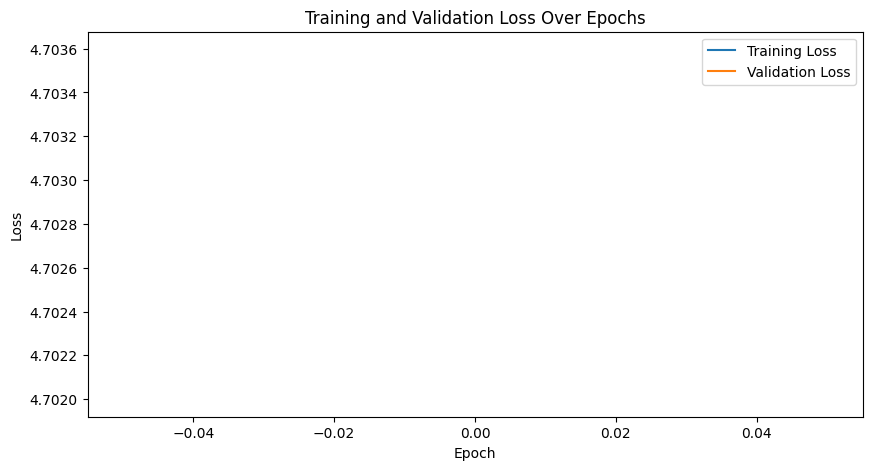

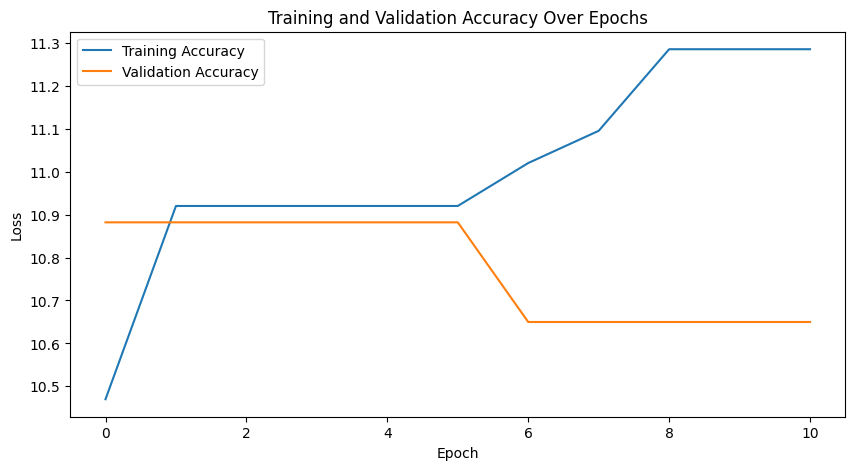

Extracting Embeddings: 100%|██████████| 485/485 [00:06<00:00, 69.79it/s]


Distance between embedding 6589 and 2885: 0.0031
Distance between embedding 6589 and 4016: 0.0037
Distance between embedding 6589 and 5862: 0.0039
Distance between embedding 6589 and 3761: 0.0016
Distance between embedding 6589 and 2201: 0.0011
Distance between embedding 6589 and 6468: 0.0009
Distance between embedding 6589 and 3726: 0.0013
Distance between embedding 6589 and 5161: 0.0011
Distance between embedding 6589 and 1572: 0.0013
Distance between embedding 6589 and 4632: 0.0019
Distance between embedding 6589 and 1639: 0.0010
Distance between embedding 6589 and 399: 0.0013
Distance between embedding 6589 and 1987: 0.0009
Distance between embedding 6589 and 7109: 0.0010
Distance between embedding 6589 and 5832: 0.0011
Distance between embedding 6589 and 6283: 0.0049
Distance between embedding 6589 and 6233: 0.0047
Distance between embedding 6589 and 354: 0.0022
Distance between embedding 6589 and 3924: 0.0028
Distance between embedding 2885 and 4016: 0.0023
Distance between embed

Testing: 100%|██████████| 485/485 [00:06<00:00, 75.06it/s]
/home/aref/.conda/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 10.88%
Test Precision: 0.01
Test Recall: 0.11
Test F1 Score: 0.02
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 29/100:  29%|██▉       | 29/100 [12:49<31:24, 26.54s/it, val_loss=3.44, val_accuracy=63.5, train_loss=2.81, best_accuracy=66.8]


KeyboardInterrupt: 

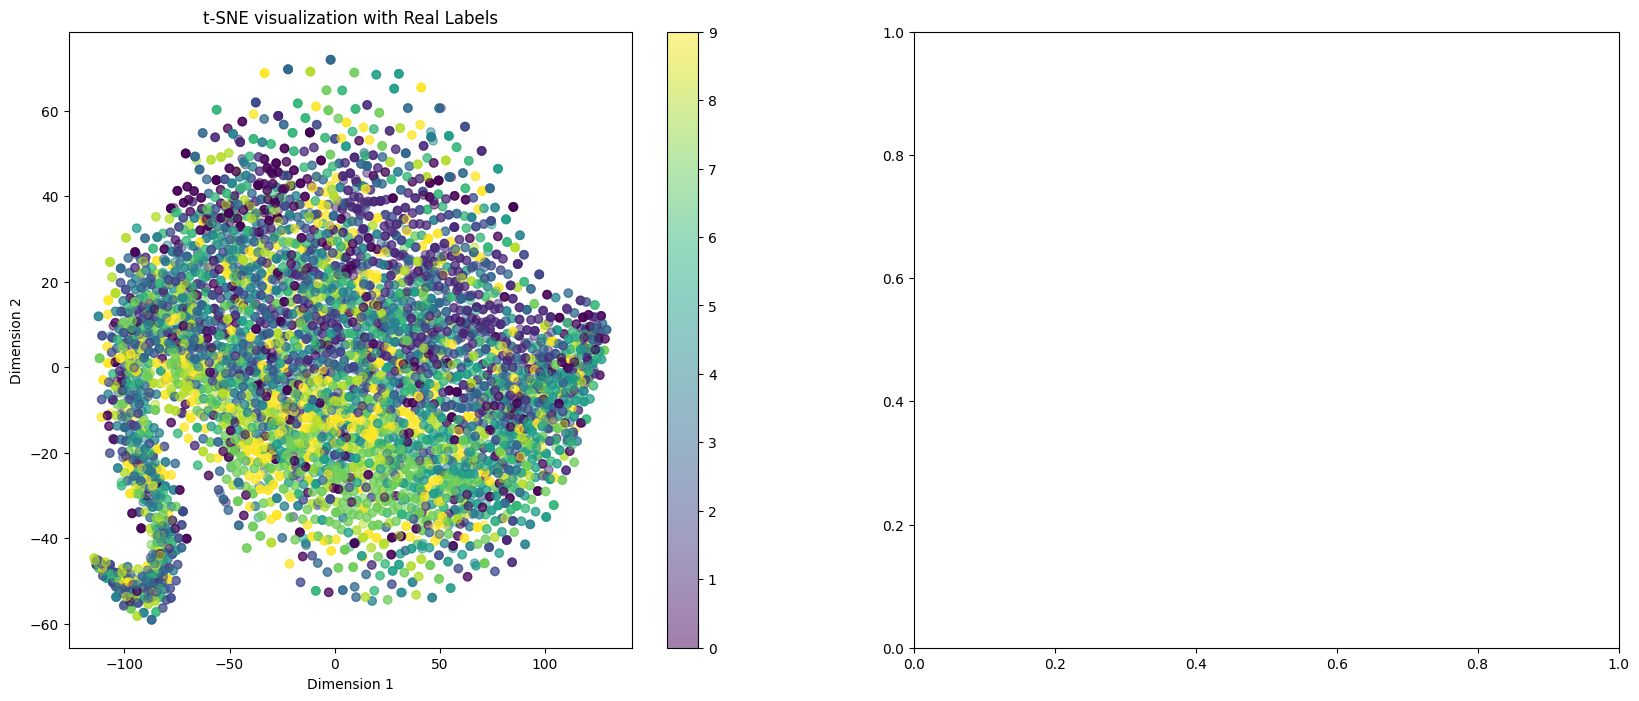

In [3]:
noise_cleaner.clean()

In [257]:
import models.predictor
import models
import importlib
importlib.reload(models)
from models import preact
importlib.reload(preact)
from models import predictor
importlib.reload(predictor)
from models.predictor import Predictor

In [17]:
clean_train_dataset = noise_cleaner.clean_dataset
test_dataset = FashionMNIST(root='data', train=False, download=False)
predictor = Predictor(train_dataset=clean_train_dataset, test_dataset=test_dataset, transform=transform, num_classes=10, model_type='resnet18', batch_size=400)

In [22]:
predictor.train(10)

Training Epoch 1/10: 100%|██████████| 113/113 [01:40<00:00,  1.12it/s]


Validation Accuracy: 93.46%
Epoch 1/10, Loss: 0.24129432162879844


Training Epoch 2/10: 100%|██████████| 113/113 [01:39<00:00,  1.13it/s]


Validation Accuracy: 96.31%
Epoch 2/10, Loss: 0.12274887458940523


Training Epoch 3/10: 100%|██████████| 113/113 [01:39<00:00,  1.13it/s]


Validation Accuracy: 97.07%
Epoch 3/10, Loss: 0.08064110191390578


Training Epoch 4/10: 100%|██████████| 113/113 [01:39<00:00,  1.14it/s]


Validation Accuracy: 96.81%
Epoch 4/10, Loss: 0.07340764353233101


Training Epoch 5/10: 100%|██████████| 113/113 [01:39<00:00,  1.14it/s]


Validation Accuracy: 96.51%
Epoch 5/10, Loss: 0.059963096196936294


Training Epoch 6/10: 100%|██████████| 113/113 [01:38<00:00,  1.15it/s]


Validation Accuracy: 97.89%
Epoch 6/10, Loss: 0.0528966288980657


Training Epoch 7/10: 100%|██████████| 113/113 [01:40<00:00,  1.13it/s]


Validation Accuracy: 97.85%
Epoch 7/10, Loss: 0.03885995962582858


Training Epoch 8/10: 100%|██████████| 113/113 [01:40<00:00,  1.13it/s]


Validation Accuracy: 97.95%
Epoch 8/10, Loss: 0.03452066272760915


Training Epoch 9/10: 100%|██████████| 113/113 [01:40<00:00,  1.12it/s]


Validation Accuracy: 98.30%
Epoch 9/10, Loss: 0.030963845262551203


Training Epoch 10/10: 100%|██████████| 113/113 [01:39<00:00,  1.13it/s]


Validation Accuracy: 98.22%
Epoch 10/10, Loss: 0.02610123477282777


In [23]:
predictor.evaluate()

Evaluating: 100%|██████████| 25/25 [00:11<00:00,  2.25it/s]

Test Accuracy: 90.21%


0.9021

## CIFAR 10

In [2]:
train_dataset = CIFAR10(root='data', train=True, download=True)
transform = transforms.Compose([
                                # transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

augmented_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar10/resnet34/model_resnet34_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='resnet50', train_noise_level=0.2, epochs_num=1000, train_pairs=200000, 
                             val_pairs=20000, embedding_dimension=64, lr=1e-5, optimizer='Adam', patience=25, transform=transform,
                             weight_decay=5e-4, training_batch_size=3000, pre_trained=True, dropout_prob=0.5, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=2, freeze_epoch=None)

Files already downloaded and verified
Seed: 49
noise count: 10296 out of 50000 data


handling big fold 1/10
number_of_pairs: 3591
Training fold 1/10...


Epoch 82/1000:   8%|▊         | 83/1000 [2:00:49<22:14:50, 87.34s/it, val_loss=4.6, val_contrastive=1.41, val_accuracy=63.4, train_loss=4.19, train_contrastive=1.42, best_accuracy=65.5, best_loss=4.6]  
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


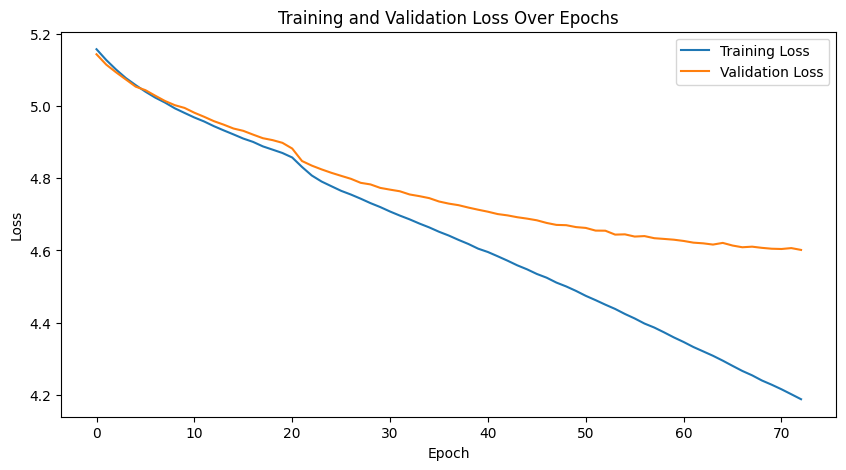

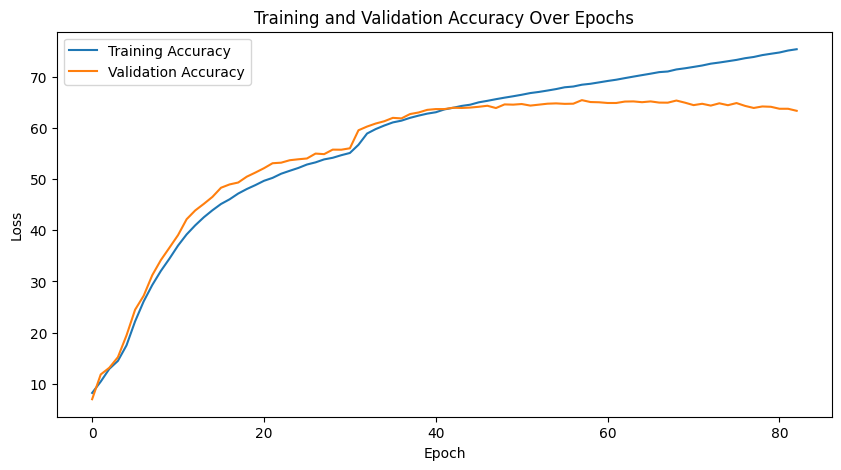

Extracting Embeddings: 100%|██████████| 404/404 [00:11<00:00, 34.70it/s]


Distance between embedding 2529 and 4295: 1.0640
Distance between embedding 2529 and 6417: 0.9625
Distance between embedding 2529 and 1056: 1.2912
Distance between embedding 2529 and 1259: 1.4385
Distance between embedding 2529 and 5054: 1.6227
Distance between embedding 2529 and 4387: 1.2792
Distance between embedding 2529 and 2230: 1.1201
Distance between embedding 2529 and 2028: 1.4175
Distance between embedding 2529 and 5328: 1.4344
Distance between embedding 2529 and 4703: 1.3863
Distance between embedding 2529 and 6095: 1.4470
Distance between embedding 2529 and 4217: 1.0559
Distance between embedding 2529 and 4274: 0.9906
Distance between embedding 2529 and 3097: 1.5248
Distance between embedding 2529 and 4713: 1.4783
Distance between embedding 2529 and 5731: 1.5224
Distance between embedding 2529 and 1834: 1.3397
Distance between embedding 2529 and 3706: 1.2664
Distance between embedding 2529 and 758: 1.4053
Distance between embedding 4295 and 6417: 1.0128
Distance between embe

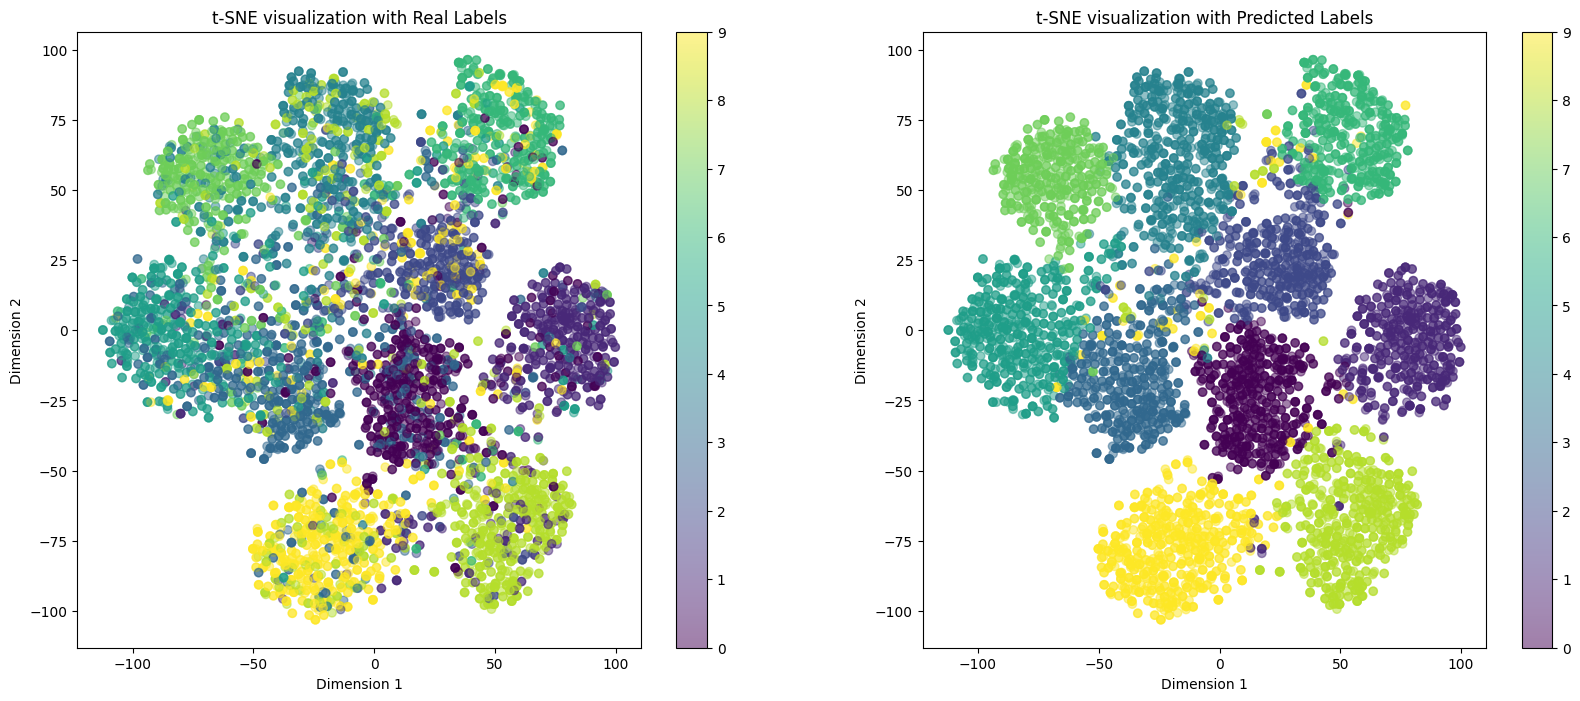

value counts for predicted:
[[  0 662]
 [  1 590]
 [  2 605]
 [  3 617]
 [  4 749]
 [  5 671]
 [  6 560]
 [  7 505]
 [  8 715]
 [  9 790]]
value counts for real:
[[  0 671]
 [  1 584]
 [  2 510]
 [  3 785]
 [  4 651]
 [  5 563]
 [  6 546]
 [  7 451]
 [  8 950]
 [  9 753]]


Testing: 100%|██████████| 404/404 [00:10<00:00, 38.81it/s]


Test Accuracy: 65.49%
Test Precision: 0.66
Test Recall: 0.65
Test F1 Score: 0.65
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 85/1000:   9%|▊         | 86/1000 [2:11:16<23:15:05, 91.58s/it, val_loss=4.81, val_contrastive=1.38, val_accuracy=61.1, train_loss=4.18, train_contrastive=1.44, best_accuracy=61.7, best_loss=4.78]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 35.95it/s]


Test Accuracy: 61.71%
Test Precision: 0.62
Test Recall: 0.62
Test F1 Score: 0.61
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/10...


Epoch 96/1000:  10%|▉         | 97/1000 [2:29:43<23:13:45, 92.61s/it, val_loss=4.79, val_contrastive=1.36, val_accuracy=58.4, train_loss=4.17, train_contrastive=1.44, best_accuracy=61.9, best_loss=4.79]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:10<00:00, 36.96it/s]


Test Accuracy: 61.90%
Test Precision: 0.62
Test Recall: 0.62
Test F1 Score: 0.62
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/10...


Epoch 81/1000:   8%|▊         | 82/1000 [2:03:17<23:00:10, 90.21s/it, val_loss=4.58, val_contrastive=1.43, val_accuracy=64.2, train_loss=4.15, train_contrastive=1.45, best_accuracy=67.3, best_loss=4.58]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 36.70it/s]


Test Accuracy: 67.30%
Test Precision: 0.67
Test Recall: 0.67
Test F1 Score: 0.67
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/10...


Epoch 84/1000:   8%|▊         | 85/1000 [2:07:47<22:55:35, 90.20s/it, val_loss=4.58, val_contrastive=1.4, val_accuracy=63.2, train_loss=4.13, train_contrastive=1.42, best_accuracy=65.1, best_loss=4.57] 
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 36.47it/s]


Test Accuracy: 65.05%
Test Precision: 0.65
Test Recall: 0.65
Test F1 Score: 0.65
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/10...


Epoch 79/1000:   8%|▊         | 80/1000 [2:00:56<23:10:52, 90.71s/it, val_loss=4.7, val_contrastive=1.37, val_accuracy=63.1, train_loss=4.32, train_contrastive=1.4, best_accuracy=63.9, best_loss=4.7]   
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 36.65it/s]


Test Accuracy: 63.92%
Test Precision: 0.64
Test Recall: 0.64
Test F1 Score: 0.64
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/10...


Epoch 77/1000:   8%|▊         | 78/1000 [1:57:54<23:13:47, 90.70s/it, val_loss=4.6, val_contrastive=1.43, val_accuracy=62.2, train_loss=4.1, train_contrastive=1.45, best_accuracy=65.7, best_loss=4.59]  
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:10<00:00, 37.16it/s]


Test Accuracy: 65.67%
Test Precision: 0.66
Test Recall: 0.66
Test F1 Score: 0.66
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_7.pth
Finished training fold 7
Training fold 8/10...


Epoch 77/1000:   8%|▊         | 78/1000 [1:59:59<23:38:25, 92.31s/it, val_loss=4.72, val_contrastive=1.41, val_accuracy=63.1, train_loss=4.26, train_contrastive=1.41, best_accuracy=65.7, best_loss=4.71]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 35.06it/s]


Test Accuracy: 65.72%
Test Precision: 0.66
Test Recall: 0.66
Test F1 Score: 0.66
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_8.pth
Finished training fold 8
Training fold 9/10...


Epoch 89/1000:   9%|▉         | 90/1000 [2:17:52<23:13:59, 91.91s/it, val_loss=4.72, val_contrastive=1.41, val_accuracy=64.3, train_loss=4.31, train_contrastive=1.4, best_accuracy=66.3, best_loss=4.72] 
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:10<00:00, 38.07it/s]


Test Accuracy: 66.34%
Test Precision: 0.66
Test Recall: 0.66
Test F1 Score: 0.66
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_9.pth
Finished training fold 9
Training fold 10/10...


Epoch 92/1000:   9%|▉         | 93/1000 [2:21:20<22:58:25, 91.19s/it, val_loss=4.65, val_contrastive=1.41, val_accuracy=62, train_loss=4.15, train_contrastive=1.41, best_accuracy=62.9, best_loss=4.65]  
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 35.94it/s]


Test Accuracy: 62.93%
Test Precision: 0.64
Test Recall: 0.63
Test F1 Score: 0.62
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_10.pth
Finished training fold 10


a:\Projects\SiameseNoiseDetection\models\detector.py:220: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_save_path, map_location=self.d

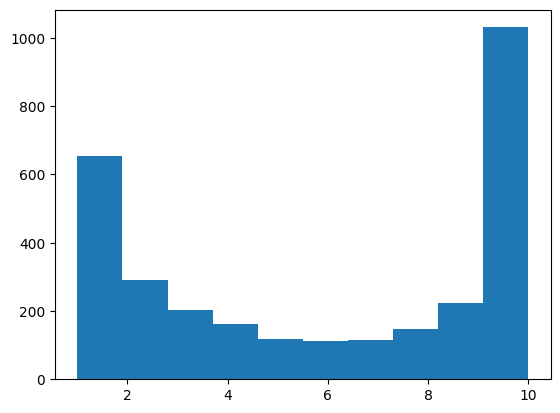

Predicted noise indices: [np.int64(0), np.int64(165), np.int64(175), np.int64(201), np.int64(249), np.int64(289), np.int64(400), np.int64(420), np.int64(436), np.int64(455), np.int64(486), np.int64(488), np.int64(495), np.int64(497), np.int64(633), np.int64(664), np.int64(710), np.int64(751), np.int64(845), np.int64(893), np.int64(933), np.int64(939), np.int64(941), np.int64(951), np.int64(1016), np.int64(1121), np.int64(1159), np.int64(1271), np.int64(1348), np.int64(1380), np.int64(1496), np.int64(1502), np.int64(1546), np.int64(1560), np.int64(1569), np.int64(1600), np.int64(1612), np.int64(1624), np.int64(1665), np.int64(1676), np.int64(1715), np.int64(1778), np.int64(1839), np.int64(1887), np.int64(1940), np.int64(1965), np.int64(2067), np.int64(2089), np.int64(2149), np.int64(2164), np.int64(2180), np.int64(2205), np.int64(2367), np.int64(2388), np.int64(2510), np.int64(2525), np.int64(2540), np.int64(2547), np.int64(2589), np.int64(2622), np.int64(2640), np.int64(2661), np.int64

Epoch 77/1000:   8%|▊         | 78/1000 [1:58:37<23:22:07, 91.24s/it, val_loss=4.6, val_contrastive=1.39, val_accuracy=64.2, train_loss=4.19, train_contrastive=1.42, best_accuracy=66.1, best_loss=4.6]  
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


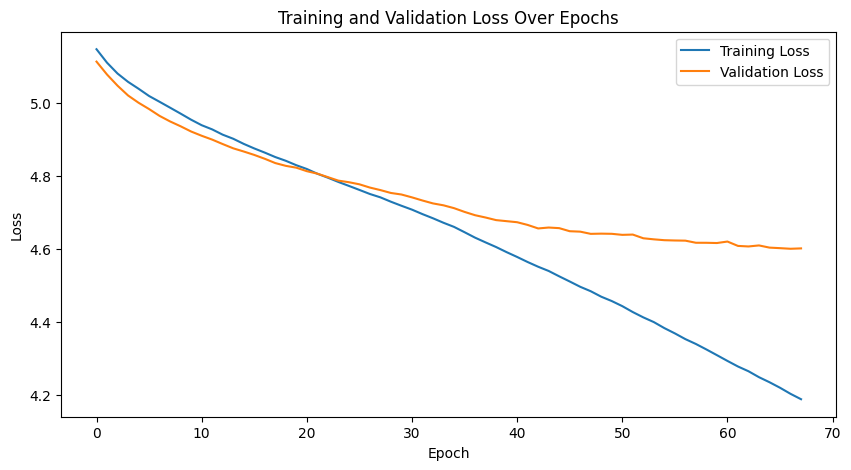

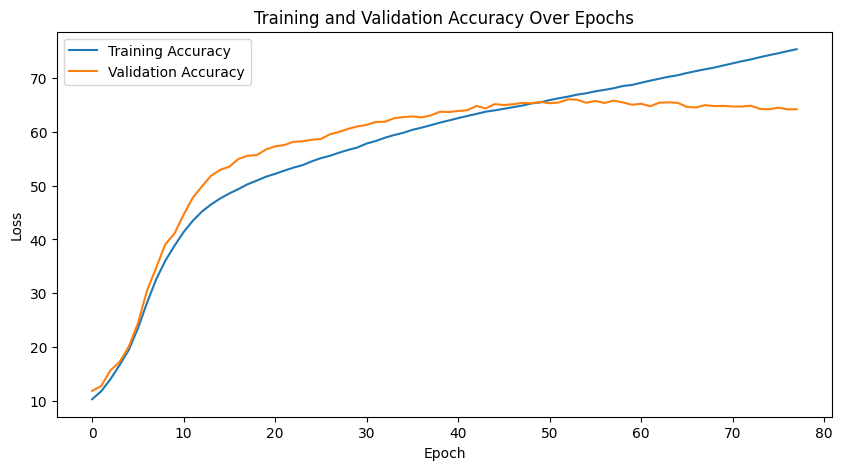

Extracting Embeddings: 100%|██████████| 404/404 [00:11<00:00, 33.86it/s]


Distance between embedding 5049 and 3379: 1.6030
Distance between embedding 5049 and 2606: 1.1670
Distance between embedding 5049 and 5777: 1.4386
Distance between embedding 5049 and 4289: 1.3019
Distance between embedding 5049 and 2353: 1.5628
Distance between embedding 5049 and 5658: 1.4723
Distance between embedding 5049 and 2581: 0.8104
Distance between embedding 5049 and 289: 1.4100
Distance between embedding 5049 and 3513: 1.4578
Distance between embedding 5049 and 4565: 1.4601
Distance between embedding 5049 and 5711: 1.4318
Distance between embedding 5049 and 1150: 1.5392
Distance between embedding 5049 and 2005: 1.4308
Distance between embedding 5049 and 2907: 1.4500
Distance between embedding 5049 and 4260: 1.4798
Distance between embedding 5049 and 777: 1.5355
Distance between embedding 5049 and 2630: 1.5408
Distance between embedding 5049 and 5977: 1.0470
Distance between embedding 5049 and 6050: 1.2117
Distance between embedding 3379 and 2606: 1.3781
Distance between embed

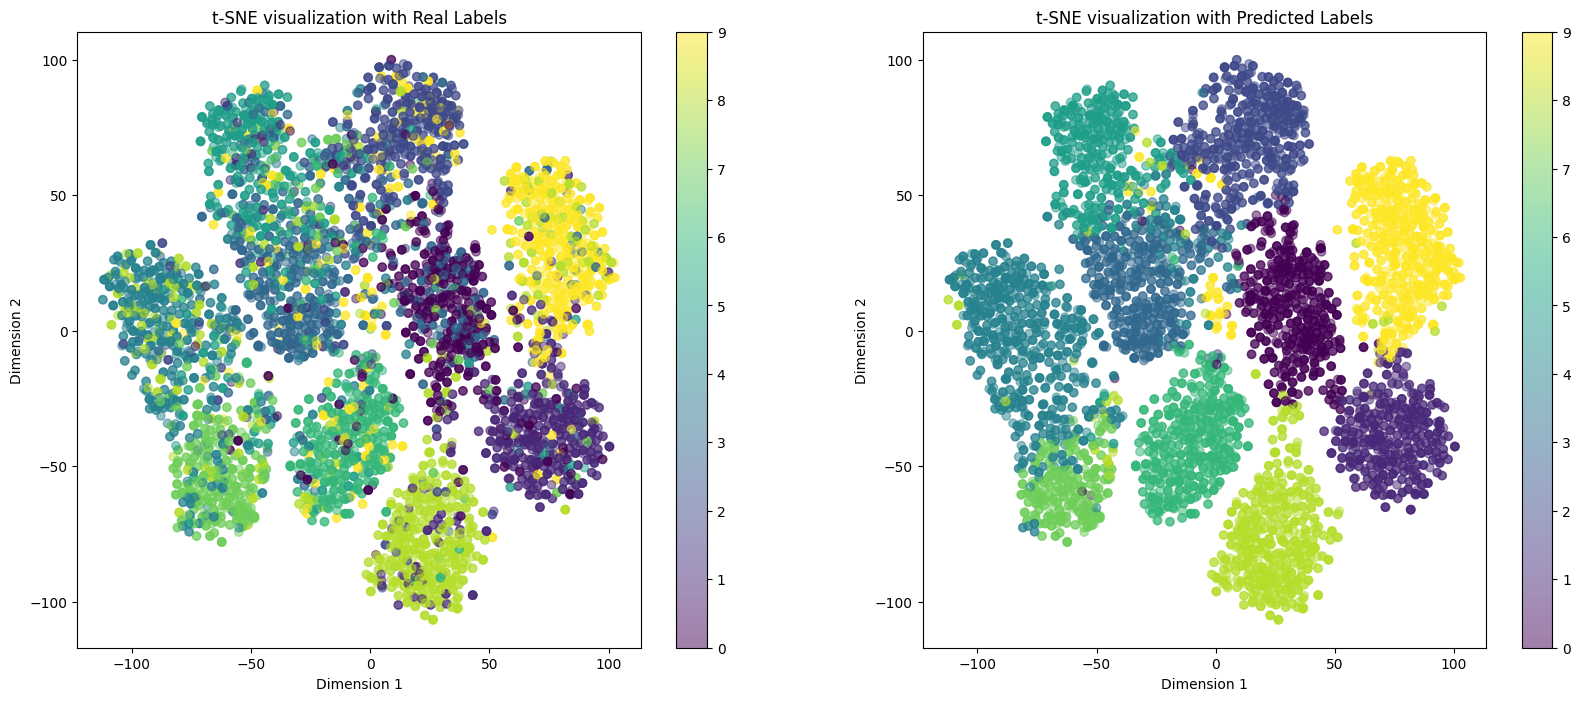

value counts for predicted:
[[  0 653]
 [  1 579]
 [  2 681]
 [  3 578]
 [  4 992]
 [  5 524]
 [  6 640]
 [  7 339]
 [  8 726]
 [  9 752]]
value counts for real:
[[  0 650]
 [  1 630]
 [  2 573]
 [  3 736]
 [  4 675]
 [  5 552]
 [  6 513]
 [  7 473]
 [  8 894]
 [  9 768]]


Testing: 100%|██████████| 404/404 [00:11<00:00, 36.64it/s]


Test Accuracy: 66.06%
Test Precision: 0.67
Test Recall: 0.66
Test F1 Score: 0.66
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 77/1000:   8%|▊         | 78/1000 [1:57:46<23:12:13, 90.60s/it, val_loss=4.63, val_contrastive=1.43, val_accuracy=62.3, train_loss=4.09, train_contrastive=1.45, best_accuracy=64.5, best_loss=4.63]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 36.56it/s]


Test Accuracy: 64.46%
Test Precision: 0.65
Test Recall: 0.64
Test F1 Score: 0.64
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/10...


Epoch 80/1000:   8%|▊         | 81/1000 [2:02:52<23:14:06, 91.02s/it, val_loss=4.8, val_contrastive=1.34, val_accuracy=62.2, train_loss=4.36, train_contrastive=1.38, best_accuracy=63.5, best_loss=4.8]  
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 36.37it/s]


Test Accuracy: 63.49%
Test Precision: 0.65
Test Recall: 0.63
Test F1 Score: 0.63
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/10...


Epoch 130/1000:  13%|█▎        | 131/1000 [3:17:28<21:49:55, 90.44s/it, val_loss=4.83, val_contrastive=1.36, val_accuracy=58.1, train_loss=3.78, train_contrastive=1.47, best_accuracy=58.7, best_loss=4.83]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:10<00:00, 37.35it/s]


Test Accuracy: 58.73%
Test Precision: 0.59
Test Recall: 0.59
Test F1 Score: 0.58
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/10...


Epoch 80/1000:   8%|▊         | 81/1000 [2:03:20<23:19:25, 91.37s/it, val_loss=4.65, val_contrastive=1.39, val_accuracy=61, train_loss=4.18, train_contrastive=1.44, best_accuracy=63.8, best_loss=4.64]  
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:10<00:00, 36.75it/s]


Test Accuracy: 63.83%
Test Precision: 0.64
Test Recall: 0.64
Test F1 Score: 0.64
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/10...


Epoch 82/1000:   8%|▊         | 83/1000 [2:07:07<23:24:28, 91.90s/it, val_loss=4.57, val_contrastive=1.43, val_accuracy=63.7, train_loss=4.07, train_contrastive=1.46, best_accuracy=66.2, best_loss=4.56]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:10<00:00, 37.03it/s]


Test Accuracy: 66.21%
Test Precision: 0.66
Test Recall: 0.66
Test F1 Score: 0.66
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/10...


Epoch 64/1000:   6%|▋         | 65/1000 [1:40:13<24:01:34, 92.51s/it, val_loss=4.54, val_contrastive=1.42, val_accuracy=64.3, train_loss=4.18, train_contrastive=1.42, best_accuracy=66.5, best_loss=4.53]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:10<00:00, 36.88it/s]


Test Accuracy: 66.51%
Test Precision: 0.67
Test Recall: 0.67
Test F1 Score: 0.66
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_7.pth
Finished training fold 7
Training fold 8/10...


Epoch 72/1000:   7%|▋         | 73/1000 [1:50:28<23:22:51, 90.80s/it, val_loss=4.51, val_contrastive=1.41, val_accuracy=63.2, train_loss=4.1, train_contrastive=1.43, best_accuracy=65.2, best_loss=4.51] 
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:10<00:00, 37.78it/s]


Test Accuracy: 65.22%
Test Precision: 0.66
Test Recall: 0.65
Test F1 Score: 0.65
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_8.pth
Finished training fold 8
Training fold 9/10...


Epoch 70/1000:   7%|▋         | 71/1000 [1:47:52<23:31:31, 91.16s/it, val_loss=4.54, val_contrastive=1.41, val_accuracy=64.1, train_loss=4.14, train_contrastive=1.42, best_accuracy=66, best_loss=4.54]  
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 36.43it/s]


Test Accuracy: 66.04%
Test Precision: 0.66
Test Recall: 0.66
Test F1 Score: 0.66
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_9.pth
Finished training fold 9
Training fold 10/10...


Epoch 80/1000:   8%|▊         | 81/1000 [2:03:36<23:22:30, 91.57s/it, val_loss=4.62, val_contrastive=1.45, val_accuracy=63.1, train_loss=4.15, train_contrastive=1.46, best_accuracy=65.1, best_loss=4.62]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:10<00:00, 37.87it/s]


Test Accuracy: 65.11%
Test Precision: 0.65
Test Recall: 0.65
Test F1 Score: 0.65
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_10.pth
Finished training fold 10


a:\Projects\SiameseNoiseDetection\models\detector.py:220: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_save_path, map_location=self.d

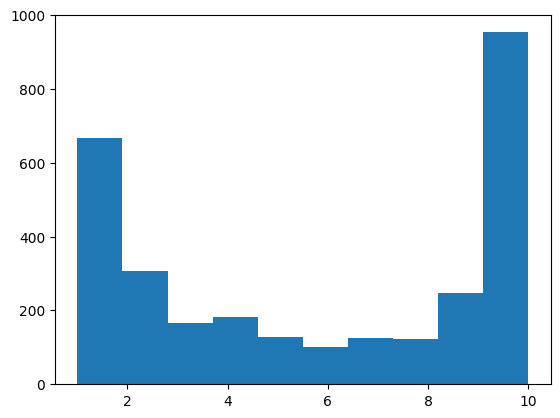

Predicted noise indices: [np.int64(72), np.int64(146), np.int64(161), np.int64(191), np.int64(277), np.int64(355), np.int64(448), np.int64(487), np.int64(611), np.int64(625), np.int64(789), np.int64(810), np.int64(820), np.int64(839), np.int64(844), np.int64(880), np.int64(912), np.int64(923), np.int64(926), np.int64(1007), np.int64(1185), np.int64(1209), np.int64(1398), np.int64(1418), np.int64(1431), np.int64(1508), np.int64(1586), np.int64(1607), np.int64(1641), np.int64(1719), np.int64(1905), np.int64(1933), np.int64(1941), np.int64(2005), np.int64(2012), np.int64(2027), np.int64(2063), np.int64(2103), np.int64(2159), np.int64(2184), np.int64(2214), np.int64(2218), np.int64(2237), np.int64(2286), np.int64(2316), np.int64(2419), np.int64(2488), np.int64(2524), np.int64(2648), np.int64(2723), np.int64(2737), np.int64(2874), np.int64(2915), np.int64(2948), np.int64(2989), np.int64(3029), np.int64(3144), np.int64(3176), np.int64(3177), np.int64(3260), np.int64(3283), np.int64(3297), np

Epoch 86/1000:   9%|▊         | 87/1000 [2:11:34<23:00:48, 90.74s/it, val_loss=4.63, val_contrastive=1.42, val_accuracy=62.3, train_loss=4.17, train_contrastive=1.43, best_accuracy=65.7, best_loss=4.63]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


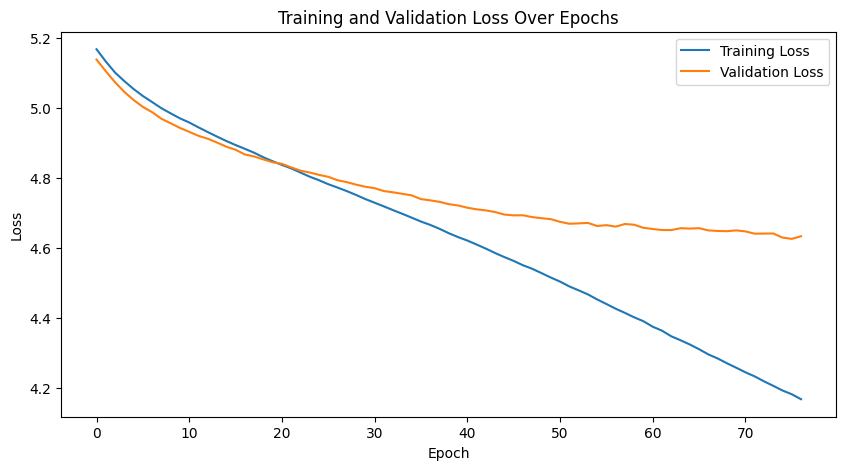

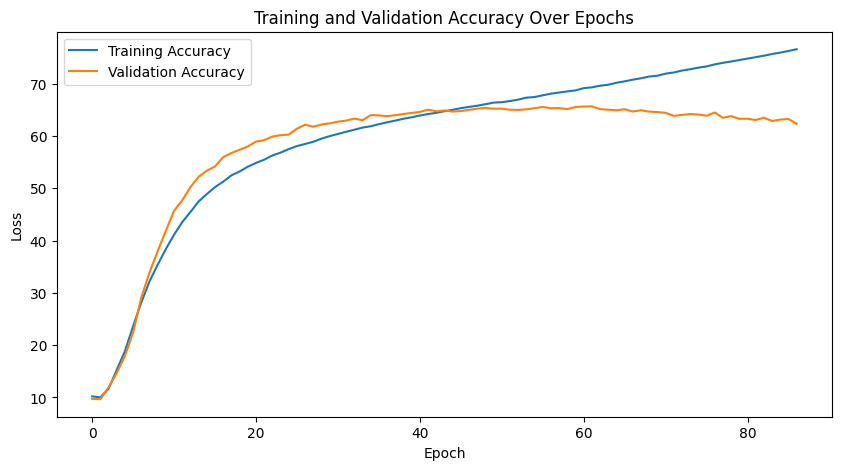

Extracting Embeddings: 100%|██████████| 404/404 [00:12<00:00, 33.35it/s]


Distance between embedding 5274 and 3297: 1.3441
Distance between embedding 5274 and 2435: 1.4588
Distance between embedding 5274 and 5175: 1.4522
Distance between embedding 5274 and 4468: 1.3683
Distance between embedding 5274 and 5052: 1.5313
Distance between embedding 5274 and 4224: 1.3170
Distance between embedding 5274 and 3843: 1.2136
Distance between embedding 5274 and 5462: 1.6664
Distance between embedding 5274 and 3263: 1.5070
Distance between embedding 5274 and 3524: 1.3073
Distance between embedding 5274 and 2650: 1.4830
Distance between embedding 5274 and 1466: 1.5422
Distance between embedding 5274 and 566: 1.3714
Distance between embedding 5274 and 2686: 1.4683
Distance between embedding 5274 and 442: 1.4547
Distance between embedding 5274 and 3812: 1.3186
Distance between embedding 5274 and 454: 1.3304
Distance between embedding 5274 and 2045: 1.2254
Distance between embedding 5274 and 53: 1.5194
Distance between embedding 3297 and 2435: 1.6047
Distance between embeddin

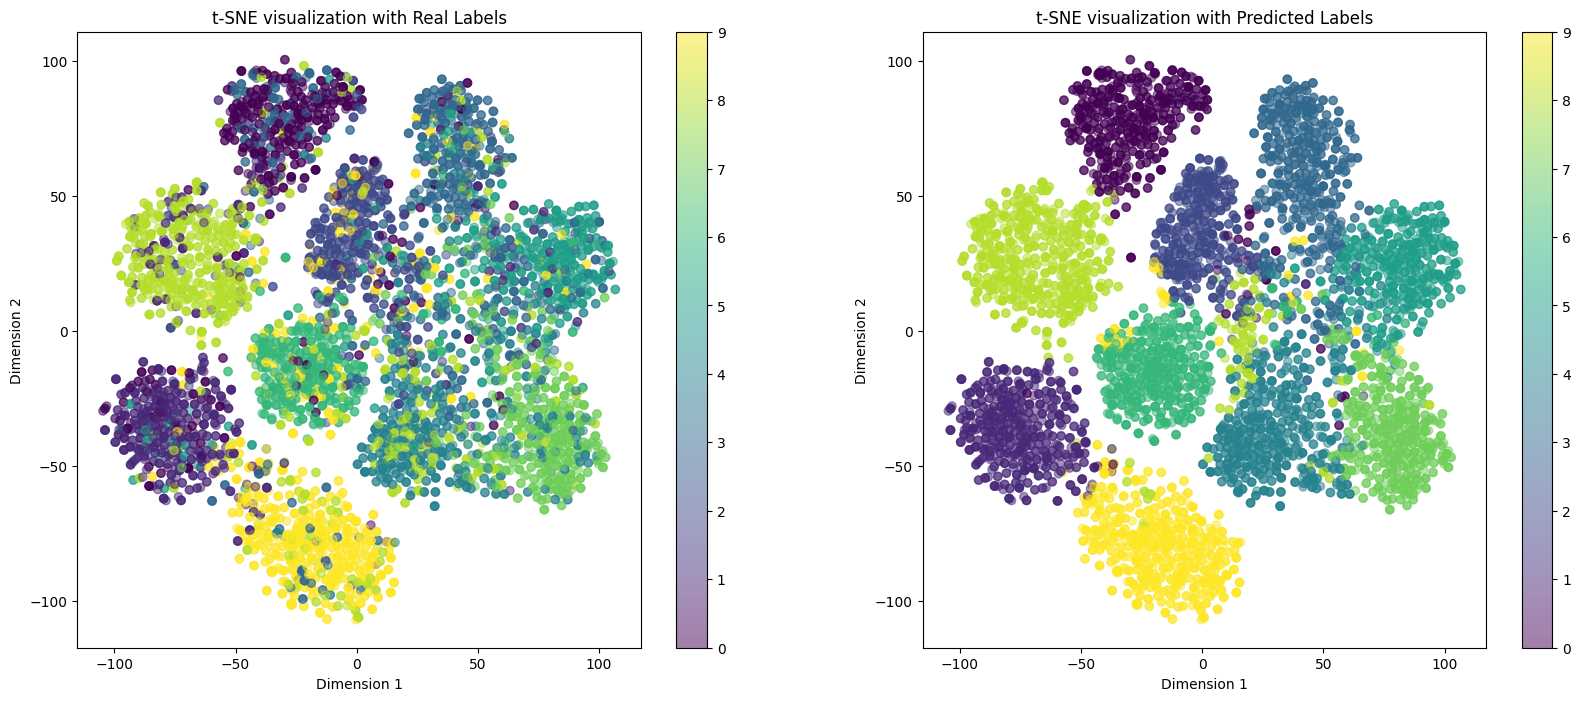

value counts for predicted:
[[  0 637]
 [  1 622]
 [  2 492]
 [  3 702]
 [  4 718]
 [  5 519]
 [  6 595]
 [  7 556]
 [  8 874]
 [  9 749]]
value counts for real:
[[   0  602]
 [   1  614]
 [   2  507]
 [   3  766]
 [   4  654]
 [   5  518]
 [   6  469]
 [   7  532]
 [   8 1004]
 [   9  798]]


Testing: 100%|██████████| 404/404 [00:11<00:00, 36.16it/s]


Test Accuracy: 65.66%
Test Precision: 0.66
Test Recall: 0.66
Test F1 Score: 0.66
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 86/1000:   9%|▊         | 87/1000 [2:04:58<21:51:33, 86.19s/it, val_loss=4.69, val_contrastive=1.4, val_accuracy=62.3, train_loss=4.16, train_contrastive=1.44, best_accuracy=64.1, best_loss=4.68] 
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 36.32it/s]


Test Accuracy: 64.08%
Test Precision: 0.64
Test Recall: 0.64
Test F1 Score: 0.64
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/10...


Epoch 184/1000:  18%|█▊        | 185/1000 [4:39:38<20:31:54, 90.69s/it, val_loss=4.77, val_contrastive=1.42, val_accuracy=59.4, train_loss=3.62, train_contrastive=1.45, best_accuracy=60.1, best_loss=4.77]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 35.37it/s]


Test Accuracy: 60.10%
Test Precision: 0.61
Test Recall: 0.60
Test F1 Score: 0.60
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/10...


Epoch 81/1000:   8%|▊         | 82/1000 [2:04:10<23:10:14, 90.87s/it, val_loss=4.59, val_contrastive=1.46, val_accuracy=63.4, train_loss=4.11, train_contrastive=1.46, best_accuracy=65.7, best_loss=4.57]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 36.28it/s]


Test Accuracy: 65.67%
Test Precision: 0.66
Test Recall: 0.66
Test F1 Score: 0.66
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/10...


Epoch 83/1000:   8%|▊         | 84/1000 [2:07:12<23:07:08, 90.86s/it, val_loss=4.59, val_contrastive=1.42, val_accuracy=62.7, train_loss=4.07, train_contrastive=1.44, best_accuracy=64.6, best_loss=4.59]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:10<00:00, 39.30it/s]


Test Accuracy: 64.63%
Test Precision: 0.64
Test Recall: 0.65
Test F1 Score: 0.64
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/10...


Epoch 71/1000:   7%|▋         | 72/1000 [1:48:08<23:13:43, 90.11s/it, val_loss=4.55, val_contrastive=1.42, val_accuracy=63.2, train_loss=4.11, train_contrastive=1.43, best_accuracy=66.3, best_loss=4.55]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:10<00:00, 38.30it/s]


Test Accuracy: 66.29%
Test Precision: 0.66
Test Recall: 0.66
Test F1 Score: 0.66
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/10...


Epoch 73/1000:   7%|▋         | 74/1000 [1:50:36<23:04:10, 89.69s/it, val_loss=4.64, val_contrastive=1.44, val_accuracy=62, train_loss=4.14, train_contrastive=1.44, best_accuracy=63.4, best_loss=4.62]  
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:10<00:00, 36.76it/s]


Test Accuracy: 63.40%
Test Precision: 0.64
Test Recall: 0.63
Test F1 Score: 0.63
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_7.pth
Finished training fold 7
Training fold 8/10...


Epoch 69/1000:   7%|▋         | 70/1000 [1:45:00<23:15:06, 90.01s/it, val_loss=4.63, val_contrastive=1.42, val_accuracy=63.3, train_loss=4.12, train_contrastive=1.44, best_accuracy=65.5, best_loss=4.62]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 36.54it/s]


Test Accuracy: 65.53%
Test Precision: 0.65
Test Recall: 0.66
Test F1 Score: 0.65
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_8.pth
Finished training fold 8
Training fold 9/10...


Epoch 78/1000:   8%|▊         | 79/1000 [1:59:32<23:13:35, 90.79s/it, val_loss=4.51, val_contrastive=1.42, val_accuracy=65.5, train_loss=4.08, train_contrastive=1.43, best_accuracy=67.3, best_loss=4.5] 
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 35.39it/s]


Test Accuracy: 67.30%
Test Precision: 0.68
Test Recall: 0.67
Test F1 Score: 0.67
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_9.pth
Finished training fold 9
Training fold 10/10...


Epoch 81/1000:   8%|▊         | 82/1000 [2:05:27<23:24:32, 91.80s/it, val_loss=4.57, val_contrastive=1.4, val_accuracy=62.3, train_loss=4.12, train_contrastive=1.44, best_accuracy=64.6, best_loss=4.57] 
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 36.63it/s]


Test Accuracy: 64.59%
Test Precision: 0.65
Test Recall: 0.65
Test F1 Score: 0.64
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_10.pth
Finished training fold 10


a:\Projects\SiameseNoiseDetection\models\detector.py:220: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_save_path, map_location=self.d

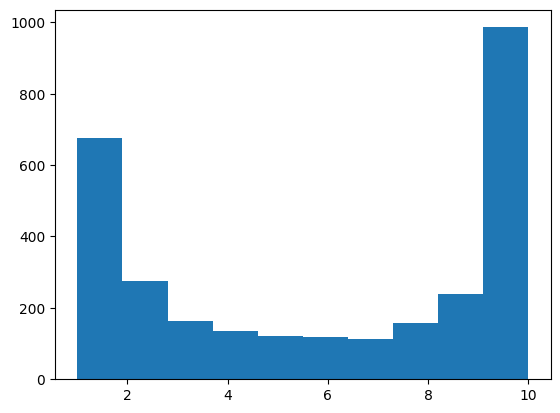

Predicted noise indices: [np.int64(71), np.int64(87), np.int64(124), np.int64(151), np.int64(222), np.int64(257), np.int64(287), np.int64(378), np.int64(418), np.int64(421), np.int64(428), np.int64(435), np.int64(452), np.int64(531), np.int64(589), np.int64(606), np.int64(607), np.int64(735), np.int64(891), np.int64(958), np.int64(997), np.int64(1012), np.int64(1030), np.int64(1064), np.int64(1117), np.int64(1120), np.int64(1127), np.int64(1168), np.int64(1282), np.int64(1350), np.int64(1523), np.int64(1618), np.int64(1682), np.int64(1698), np.int64(1879), np.int64(1951), np.int64(1955), np.int64(2033), np.int64(2083), np.int64(2132), np.int64(2146), np.int64(2199), np.int64(2233), np.int64(2236), np.int64(2279), np.int64(2284), np.int64(2374), np.int64(2400), np.int64(2404), np.int64(2405), np.int64(2408), np.int64(2421), np.int64(2438), np.int64(2455), np.int64(2480), np.int64(2487), np.int64(2508), np.int64(2551), np.int64(2583), np.int64(2591), np.int64(2628), np.int64(2651), np.in

Epoch 80/1000:   8%|▊         | 81/1000 [2:02:21<23:08:15, 90.64s/it, val_loss=4.68, val_contrastive=1.45, val_accuracy=64.4, train_loss=4.24, train_contrastive=1.45, best_accuracy=66.8, best_loss=4.68]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


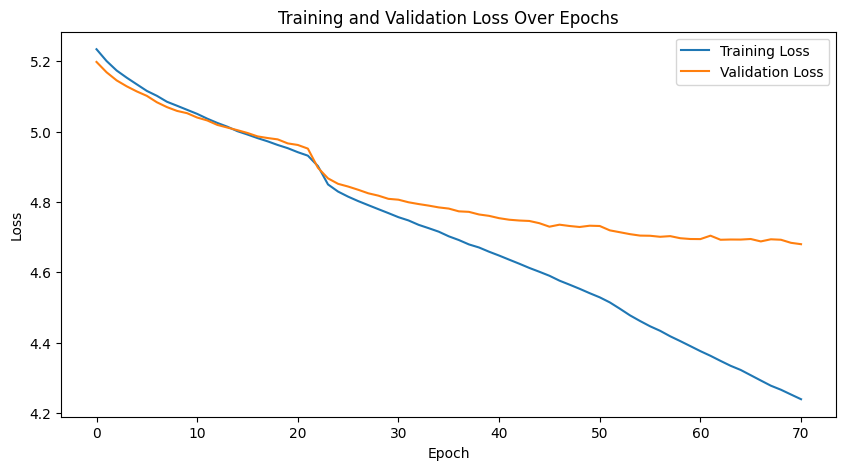

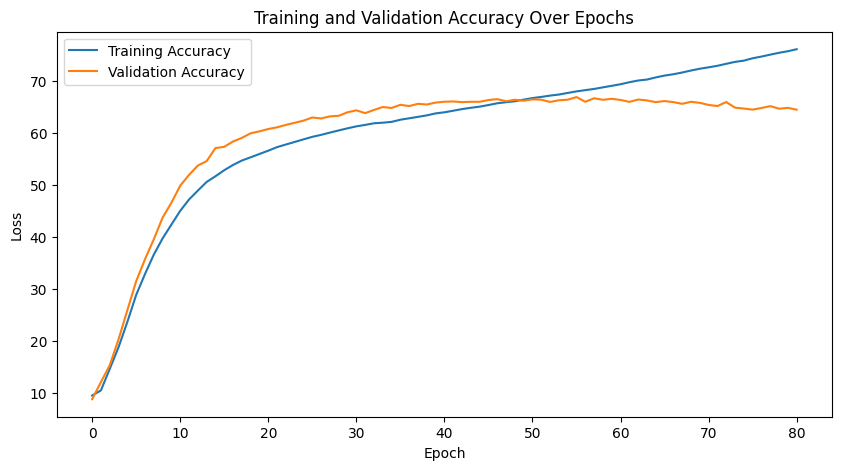

Extracting Embeddings: 100%|██████████| 404/404 [00:11<00:00, 34.60it/s]


Distance between embedding 677 and 5326: 1.2739
Distance between embedding 677 and 5762: 1.5339
Distance between embedding 677 and 83: 1.4202
Distance between embedding 677 and 1001: 1.3903
Distance between embedding 677 and 2327: 1.2117
Distance between embedding 677 and 4104: 1.1784
Distance between embedding 677 and 4942: 1.0365
Distance between embedding 677 and 6155: 1.1742
Distance between embedding 677 and 4368: 0.7035
Distance between embedding 677 and 3929: 1.1919
Distance between embedding 677 and 5575: 1.2383
Distance between embedding 677 and 865: 1.2621
Distance between embedding 677 and 1025: 1.2367
Distance between embedding 677 and 711: 1.1596
Distance between embedding 677 and 5275: 1.2631
Distance between embedding 677 and 5028: 1.2395
Distance between embedding 677 and 5396: 1.3941
Distance between embedding 677 and 4478: 0.9523
Distance between embedding 677 and 4969: 1.1964
Distance between embedding 5326 and 5762: 1.6918
Distance between embedding 5326 and 83: 1.2

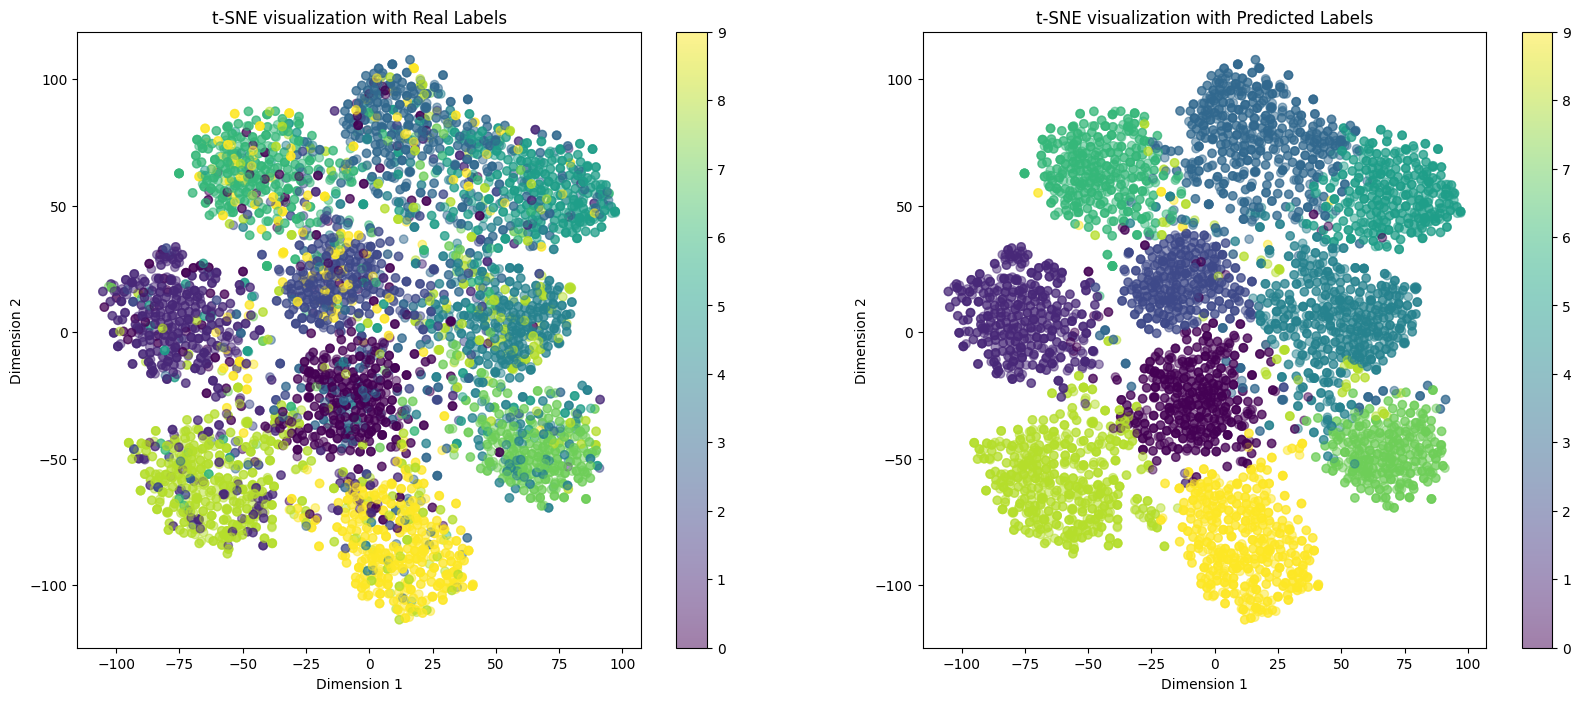

value counts for predicted:
[[  0 644]
 [  1 631]
 [  2 488]
 [  3 816]
 [  4 773]
 [  5 537]
 [  6 556]
 [  7 464]
 [  8 834]
 [  9 721]]
value counts for real:
[[  0 674]
 [  1 680]
 [  2 533]
 [  3 697]
 [  4 647]
 [  5 584]
 [  6 489]
 [  7 439]
 [  8 921]
 [  9 800]]


Testing: 100%|██████████| 404/404 [00:11<00:00, 36.05it/s]


Test Accuracy: 66.85%
Test Precision: 0.67
Test Recall: 0.67
Test F1 Score: 0.67
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 83/1000:   8%|▊         | 84/1000 [2:07:11<23:07:04, 90.86s/it, val_loss=4.63, val_contrastive=1.44, val_accuracy=63.5, train_loss=4.23, train_contrastive=1.43, best_accuracy=65.5, best_loss=4.63]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 36.41it/s]


Test Accuracy: 65.50%
Test Precision: 0.65
Test Recall: 0.66
Test F1 Score: 0.65
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/10...


Epoch 117/1000:  12%|█▏        | 118/1000 [2:59:05<22:18:38, 91.06s/it, val_loss=4.8, val_contrastive=1.46, val_accuracy=59.4, train_loss=4.07, train_contrastive=1.46, best_accuracy=60.4, best_loss=4.79] 
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:10<00:00, 37.35it/s]


Test Accuracy: 60.40%
Test Precision: 0.62
Test Recall: 0.60
Test F1 Score: 0.60
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/10...


Epoch 74/1000:   8%|▊         | 75/1000 [1:51:04<22:49:57, 88.86s/it, val_loss=4.64, val_contrastive=1.41, val_accuracy=62.7, train_loss=4.18, train_contrastive=1.43, best_accuracy=64.3, best_loss=4.64]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:10<00:00, 37.87it/s]


Test Accuracy: 64.26%
Test Precision: 0.65
Test Recall: 0.64
Test F1 Score: 0.64
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/10...


Epoch 80/1000:   8%|▊         | 81/1000 [2:02:31<23:10:03, 90.75s/it, val_loss=4.71, val_contrastive=1.4, val_accuracy=62, train_loss=4.29, train_contrastive=1.42, best_accuracy=64, best_loss=4.71]     
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:10<00:00, 39.21it/s]


Test Accuracy: 64.03%
Test Precision: 0.65
Test Recall: 0.64
Test F1 Score: 0.64
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/10...


Epoch 73/1000:   7%|▋         | 74/1000 [1:50:59<23:08:50, 89.99s/it, val_loss=4.53, val_contrastive=1.45, val_accuracy=64.4, train_loss=4.11, train_contrastive=1.45, best_accuracy=67.2, best_loss=4.52]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 35.43it/s]


Test Accuracy: 67.23%
Test Precision: 0.68
Test Recall: 0.67
Test F1 Score: 0.67
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/10...


Epoch 97/1000:  10%|▉         | 98/1000 [2:29:50<22:59:11, 91.74s/it, val_loss=4.64, val_contrastive=1.42, val_accuracy=62.4, train_loss=4.04, train_contrastive=1.46, best_accuracy=65.4, best_loss=4.64]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 35.65it/s]


Test Accuracy: 65.44%
Test Precision: 0.65
Test Recall: 0.65
Test F1 Score: 0.65
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_7.pth
Finished training fold 7
Training fold 8/10...


Epoch 78/1000:   8%|▊         | 79/1000 [1:59:32<23:13:32, 90.78s/it, val_loss=4.54, val_contrastive=1.4, val_accuracy=62.7, train_loss=4, train_contrastive=1.45, best_accuracy=65.8, best_loss=4.53]    
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:10<00:00, 36.97it/s]


Test Accuracy: 65.83%
Test Precision: 0.66
Test Recall: 0.66
Test F1 Score: 0.66
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_8.pth
Finished training fold 8
Training fold 9/10...


Epoch 77/1000:   8%|▊         | 78/1000 [1:57:39<23:10:47, 90.51s/it, val_loss=4.56, val_contrastive=1.39, val_accuracy=62.2, train_loss=4.14, train_contrastive=1.42, best_accuracy=64.3, best_loss=4.55]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:10<00:00, 36.85it/s]


Test Accuracy: 64.29%
Test Precision: 0.65
Test Recall: 0.64
Test F1 Score: 0.64
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_9.pth
Finished training fold 9
Training fold 10/10...


Epoch 99/1000:  10%|█         | 100/1000 [2:32:06<22:49:01, 91.27s/it, val_loss=4.69, val_contrastive=1.39, val_accuracy=60.1, train_loss=3.99, train_contrastive=1.46, best_accuracy=62.6, best_loss=4.69]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where 

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 36.45it/s]


Test Accuracy: 62.62%
Test Precision: 0.63
Test Recall: 0.63
Test F1 Score: 0.63
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_10.pth
Finished training fold 10


a:\Projects\SiameseNoiseDetection\models\detector.py:220: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_save_path, map_location=self.d

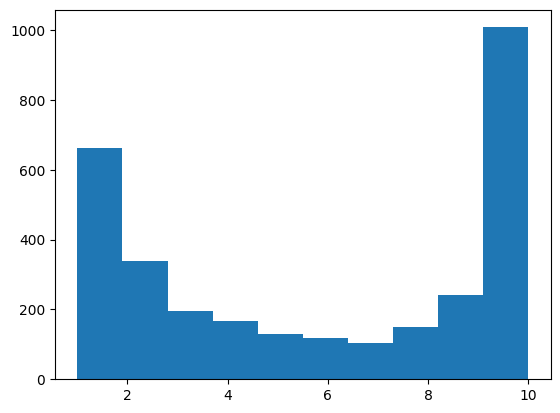

Predicted noise indices: [np.int64(1), np.int64(27), np.int64(101), np.int64(106), np.int64(223), np.int64(224), np.int64(240), np.int64(317), np.int64(322), np.int64(331), np.int64(367), np.int64(375), np.int64(446), np.int64(478), np.int64(506), np.int64(542), np.int64(651), np.int64(684), np.int64(711), np.int64(814), np.int64(906), np.int64(938), np.int64(986), np.int64(1119), np.int64(1198), np.int64(1206), np.int64(1217), np.int64(1232), np.int64(1254), np.int64(1308), np.int64(1464), np.int64(1537), np.int64(1613), np.int64(1709), np.int64(1732), np.int64(1793), np.int64(1949), np.int64(2044), np.int64(2078), np.int64(2116), np.int64(2134), np.int64(2197), np.int64(2221), np.int64(2240), np.int64(2287), np.int64(2335), np.int64(2376), np.int64(2377), np.int64(2425), np.int64(2453), np.int64(2554), np.int64(2569), np.int64(2593), np.int64(2707), np.int64(2778), np.int64(2841), np.int64(2954), np.int64(2956), np.int64(2962), np.int64(3075), np.int64(3132), np.int64(3258), np.int64

Epoch 116/1000:  12%|█▏        | 117/1000 [2:56:41<22:13:32, 90.61s/it, val_loss=4.69, val_contrastive=1.44, val_accuracy=61.4, train_loss=4.04, train_contrastive=1.46, best_accuracy=63.8, best_loss=4.68]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where

Early stopping triggered
Loading best model from checkpoint...


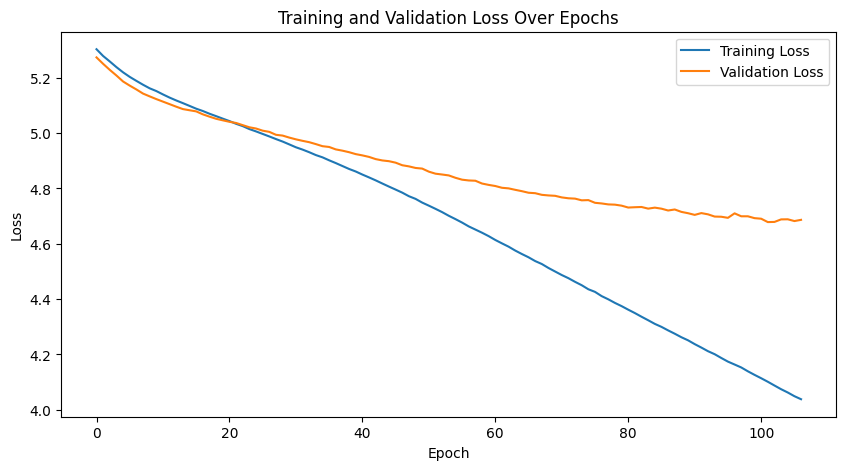

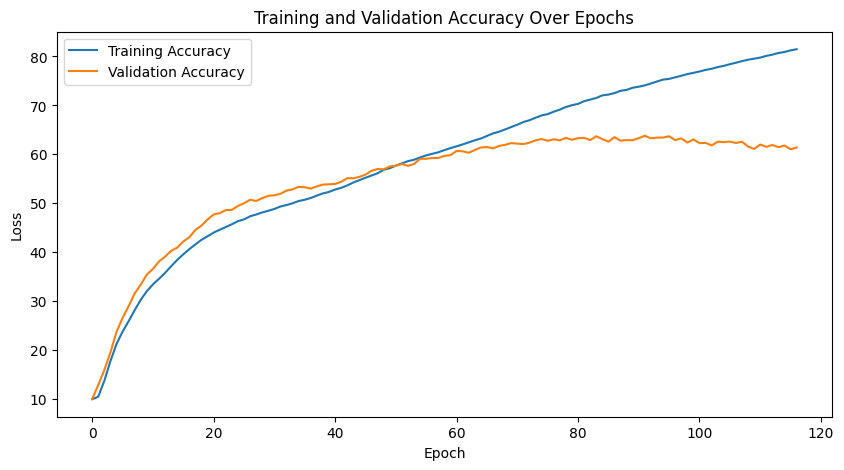

Extracting Embeddings: 100%|██████████| 404/404 [00:11<00:00, 34.12it/s]


Distance between embedding 2766 and 1119: 1.4098
Distance between embedding 2766 and 2300: 1.5777
Distance between embedding 2766 and 1236: 1.4047
Distance between embedding 2766 and 1966: 1.5544
Distance between embedding 2766 and 1886: 1.4526
Distance between embedding 2766 and 2901: 1.6500
Distance between embedding 2766 and 3519: 0.9304
Distance between embedding 2766 and 913: 1.4404
Distance between embedding 2766 and 2299: 1.6187
Distance between embedding 2766 and 4609: 0.9764
Distance between embedding 2766 and 6101: 1.5325
Distance between embedding 2766 and 42: 1.3200
Distance between embedding 2766 and 4367: 1.4805
Distance between embedding 2766 and 23: 1.3562
Distance between embedding 2766 and 3822: 1.4044
Distance between embedding 2766 and 4255: 1.4837
Distance between embedding 2766 and 1056: 1.6848
Distance between embedding 2766 and 2452: 1.3595
Distance between embedding 2766 and 6077: 1.4065
Distance between embedding 1119 and 2300: 1.1555
Distance between embeddin

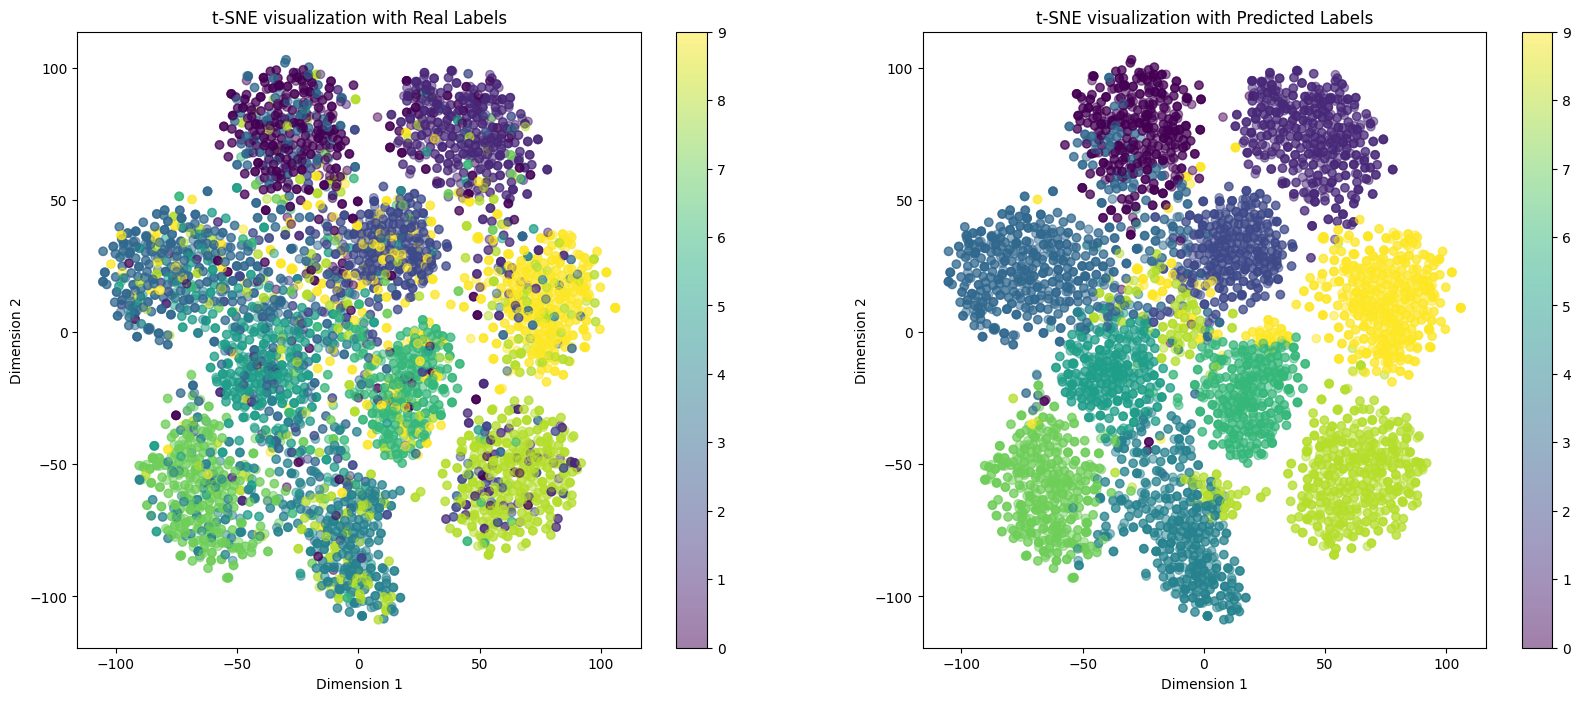

value counts for predicted:
[[  0 557]
 [  1 659]
 [  2 514]
 [  3 908]
 [  4 650]
 [  5 443]
 [  6 492]
 [  7 600]
 [  8 878]
 [  9 763]]
value counts for real:
[[  0 616]
 [  1 644]
 [  2 573]
 [  3 826]
 [  4 615]
 [  5 539]
 [  6 477]
 [  7 513]
 [  8 903]
 [  9 758]]


Testing: 100%|██████████| 404/404 [00:10<00:00, 36.79it/s]


Test Accuracy: 63.80%
Test Precision: 0.64
Test Recall: 0.64
Test F1 Score: 0.64
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 81/1000:   8%|▊         | 82/1000 [2:04:11<23:10:17, 90.87s/it, val_loss=4.63, val_contrastive=1.42, val_accuracy=63.8, train_loss=4.18, train_contrastive=1.43, best_accuracy=66.7, best_loss=4.62]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:10<00:00, 37.19it/s]


Test Accuracy: 66.69%
Test Precision: 0.67
Test Recall: 0.67
Test F1 Score: 0.67
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/10...


Epoch 78/1000:   8%|▊         | 79/1000 [1:59:16<23:10:33, 90.59s/it, val_loss=4.56, val_contrastive=1.43, val_accuracy=64.7, train_loss=4.16, train_contrastive=1.44, best_accuracy=65.9, best_loss=4.56]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 36.17it/s]


Test Accuracy: 65.86%
Test Precision: 0.66
Test Recall: 0.66
Test F1 Score: 0.66
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/10...


Epoch 76/1000:   8%|▊         | 77/1000 [1:57:55<23:33:37, 91.89s/it, val_loss=4.52, val_contrastive=1.41, val_accuracy=63.2, train_loss=3.96, train_contrastive=1.45, best_accuracy=66.2, best_loss=4.49]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 35.30it/s]


Test Accuracy: 66.23%
Test Precision: 0.66
Test Recall: 0.66
Test F1 Score: 0.66
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/10...


Epoch 71/1000:   7%|▋         | 72/1000 [1:50:13<23:40:40, 91.85s/it, val_loss=4.79, val_contrastive=1.42, val_accuracy=61.9, train_loss=4.29, train_contrastive=1.43, best_accuracy=65.1, best_loss=4.78]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 35.34it/s]


Test Accuracy: 65.11%
Test Precision: 0.66
Test Recall: 0.65
Test F1 Score: 0.65
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/10...


Epoch 62/1000:   6%|▋         | 63/1000 [1:34:14<23:21:35, 89.75s/it, val_loss=4.5, val_contrastive=1.4, val_accuracy=63.9, train_loss=4.19, train_contrastive=1.4, best_accuracy=65.6, best_loss=4.5]    
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 35.88it/s]


Test Accuracy: 65.58%
Test Precision: 0.66
Test Recall: 0.66
Test F1 Score: 0.65
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/10...


Epoch 70/1000:   7%|▋         | 71/1000 [1:47:21<23:24:42, 90.72s/it, val_loss=4.58, val_contrastive=1.39, val_accuracy=64.1, train_loss=4.23, train_contrastive=1.42, best_accuracy=65.5, best_loss=4.58]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 36.05it/s]


Test Accuracy: 65.52%
Test Precision: 0.66
Test Recall: 0.66
Test F1 Score: 0.65
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_7.pth
Finished training fold 7
Training fold 8/10...


Epoch 91/1000:   9%|▉         | 92/1000 [2:18:16<22:44:38, 90.17s/it, val_loss=4.65, val_contrastive=1.43, val_accuracy=62.3, train_loss=4.14, train_contrastive=1.44, best_accuracy=64, best_loss=4.64]  
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:10<00:00, 37.99it/s]


Test Accuracy: 64.00%
Test Precision: 0.64
Test Recall: 0.64
Test F1 Score: 0.64
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_8.pth
Finished training fold 8
Training fold 9/10...


Epoch 99/1000:  10%|█         | 100/1000 [2:37:10<23:34:38, 94.31s/it, val_loss=4.69, val_contrastive=1.44, val_accuracy=64.5, train_loss=4.29, train_contrastive=1.42, best_accuracy=66.4, best_loss=4.69]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where 

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:10<00:00, 38.44it/s]


Test Accuracy: 66.38%
Test Precision: 0.68
Test Recall: 0.66
Test F1 Score: 0.67
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_9.pth
Finished training fold 9
Training fold 10/10...


Epoch 79/1000:   8%|▊         | 80/1000 [2:02:45<23:31:48, 92.07s/it, val_loss=4.69, val_contrastive=1.35, val_accuracy=57.1, train_loss=4.26, train_contrastive=1.38, best_accuracy=57.3, best_loss=4.68]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 35.14it/s]
d:\Anaconda\ProgramData\anaconda3\envs\aref\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 57.32%
Test Precision: 0.56
Test Recall: 0.57
Test F1 Score: 0.54
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_10.pth
Finished training fold 10


a:\Projects\SiameseNoiseDetection\models\detector.py:220: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_save_path, map_location=self.d

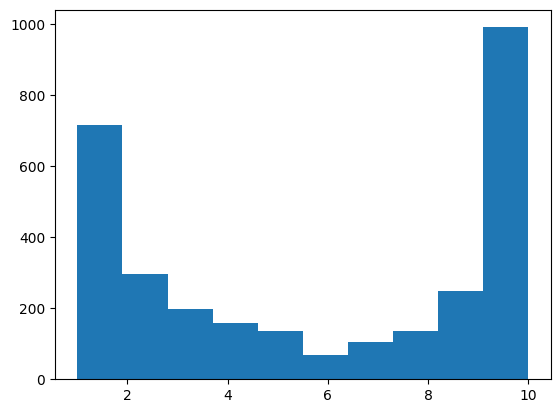

Predicted noise indices: [np.int64(47), np.int64(67), np.int64(113), np.int64(158), np.int64(211), np.int64(237), np.int64(260), np.int64(282), np.int64(437), np.int64(443), np.int64(465), np.int64(466), np.int64(569), np.int64(605), np.int64(671), np.int64(732), np.int64(761), np.int64(772), np.int64(786), np.int64(858), np.int64(895), np.int64(907), np.int64(909), np.int64(932), np.int64(964), np.int64(1053), np.int64(1081), np.int64(1134), np.int64(1141), np.int64(1208), np.int64(1269), np.int64(1289), np.int64(1321), np.int64(1551), np.int64(1661), np.int64(1735), np.int64(1865), np.int64(1907), np.int64(1937), np.int64(1944), np.int64(2109), np.int64(2127), np.int64(2156), np.int64(2162), np.int64(2252), np.int64(2320), np.int64(2322), np.int64(2324), np.int64(2410), np.int64(2513), np.int64(2533), np.int64(2686), np.int64(2687), np.int64(2765), np.int64(2853), np.int64(2879), np.int64(2901), np.int64(2944), np.int64(2990), np.int64(3008), np.int64(3010), np.int64(3028), np.int64(

Epoch 71/1000:   7%|▋         | 72/1000 [1:49:45<23:34:42, 91.47s/it, val_loss=4.55, val_contrastive=1.38, val_accuracy=62.6, train_loss=4.05, train_contrastive=1.43, best_accuracy=65.5, best_loss=4.55]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


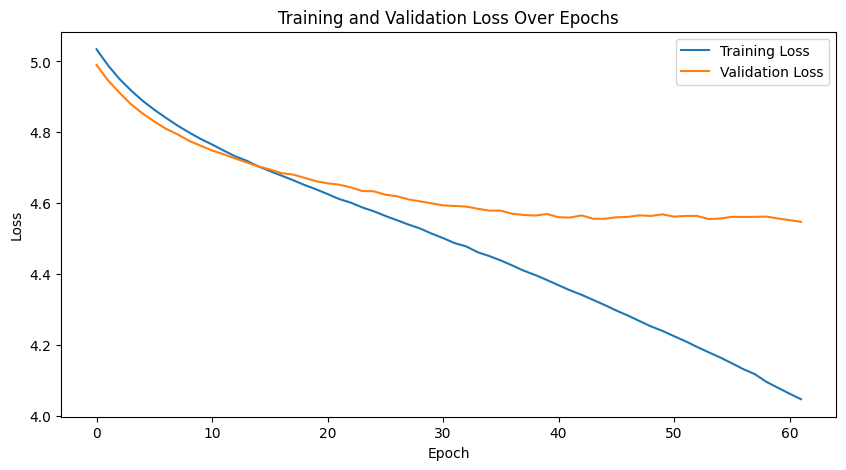

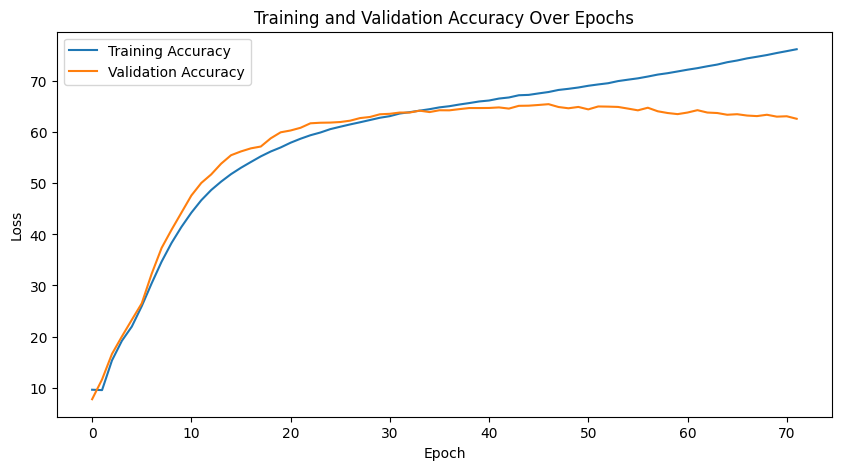

Extracting Embeddings: 100%|██████████| 404/404 [00:11<00:00, 34.04it/s]


Distance between embedding 958 and 557: 1.5614
Distance between embedding 958 and 5392: 1.3683
Distance between embedding 958 and 1214: 1.5675
Distance between embedding 958 and 4137: 1.4415
Distance between embedding 958 and 1107: 1.4361
Distance between embedding 958 and 1747: 1.4260
Distance between embedding 958 and 5994: 1.4347
Distance between embedding 958 and 3852: 1.3995
Distance between embedding 958 and 3803: 1.4620
Distance between embedding 958 and 4756: 1.4006
Distance between embedding 958 and 2560: 1.3581
Distance between embedding 958 and 6059: 1.5953
Distance between embedding 958 and 5346: 1.4855
Distance between embedding 958 and 3688: 1.6175
Distance between embedding 958 and 3535: 1.5489
Distance between embedding 958 and 1997: 1.4282
Distance between embedding 958 and 2162: 1.4571
Distance between embedding 958 and 5621: 1.1561
Distance between embedding 958 and 1624: 1.4998
Distance between embedding 557 and 5392: 1.0053
Distance between embedding 557 and 1214: 

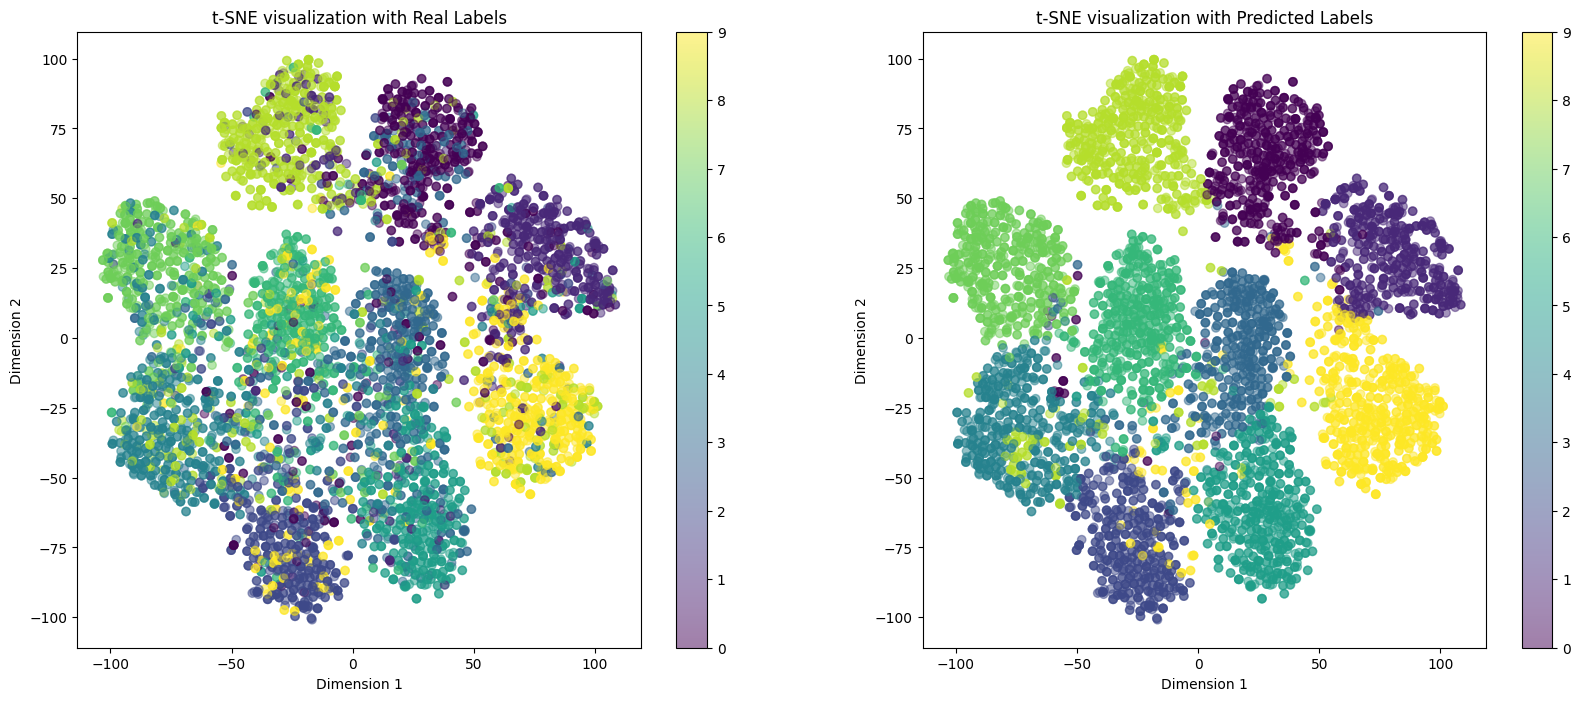

value counts for predicted:
[[  0 679]
 [  1 584]
 [  2 547]
 [  3 580]
 [  4 591]
 [  5 670]
 [  6 627]
 [  7 605]
 [  8 798]
 [  9 783]]
value counts for real:
[[  0 642]
 [  1 651]
 [  2 562]
 [  3 753]
 [  4 672]
 [  5 564]
 [  6 482]
 [  7 513]
 [  8 888]
 [  9 737]]


Testing: 100%|██████████| 404/404 [00:10<00:00, 37.46it/s]


Test Accuracy: 65.50%
Test Precision: 0.66
Test Recall: 0.66
Test F1 Score: 0.65
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 90/1000:   9%|▉         | 91/1000 [2:19:41<23:15:22, 92.10s/it, val_loss=4.75, val_contrastive=1.38, val_accuracy=63.8, train_loss=4.38, train_contrastive=1.41, best_accuracy=64.2, best_loss=4.75]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 35.29it/s]


Test Accuracy: 64.16%
Test Precision: 0.66
Test Recall: 0.64
Test F1 Score: 0.64
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/10...


Epoch 76/1000:   8%|▊         | 77/1000 [1:56:45<23:19:31, 90.98s/it, val_loss=4.81, val_contrastive=1.37, val_accuracy=61.7, train_loss=4.38, train_contrastive=1.39, best_accuracy=63.5, best_loss=4.81]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:10<00:00, 36.78it/s]


Test Accuracy: 63.51%
Test Precision: 0.64
Test Recall: 0.64
Test F1 Score: 0.64
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/10...


Epoch 73/1000:   7%|▋         | 74/1000 [1:52:01<23:21:52, 90.83s/it, val_loss=4.71, val_contrastive=1.37, val_accuracy=62.5, train_loss=4.27, train_contrastive=1.41, best_accuracy=63.3, best_loss=4.71]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:10<00:00, 37.53it/s]


Test Accuracy: 63.32%
Test Precision: 0.64
Test Recall: 0.63
Test F1 Score: 0.63
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/10...


Epoch 99/1000:  10%|█         | 100/1000 [2:32:47<22:55:03, 91.67s/it, val_loss=4.62, val_contrastive=1.43, val_accuracy=60, train_loss=3.91, train_contrastive=1.49, best_accuracy=62.6, best_loss=4.61] 
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 36.52it/s]


Test Accuracy: 62.64%
Test Precision: 0.63
Test Recall: 0.63
Test F1 Score: 0.62
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/10...


Epoch 65/1000:   7%|▋         | 66/1000 [1:38:28<23:13:30, 89.52s/it, val_loss=4.57, val_contrastive=1.41, val_accuracy=65.4, train_loss=4.26, train_contrastive=1.41, best_accuracy=66.7, best_loss=4.57]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 36.35it/s]


Test Accuracy: 66.66%
Test Precision: 0.67
Test Recall: 0.67
Test F1 Score: 0.67
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/10...


Epoch 91/1000:   9%|▉         | 92/1000 [2:20:02<23:02:09, 91.33s/it, val_loss=4.6, val_contrastive=1.4, val_accuracy=60.6, train_loss=3.96, train_contrastive=1.45, best_accuracy=63.5, best_loss=4.6]   
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 35.38it/s]


Test Accuracy: 63.51%
Test Precision: 0.64
Test Recall: 0.64
Test F1 Score: 0.63
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_7.pth
Finished training fold 7
Training fold 8/10...


Epoch 120/1000:  12%|█▏        | 121/1000 [3:02:22<22:04:55, 90.44s/it, val_loss=4.75, val_contrastive=1.4, val_accuracy=59, train_loss=4.12, train_contrastive=1.44, best_accuracy=60.5, best_loss=4.74]   
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 36.34it/s]


Test Accuracy: 60.47%
Test Precision: 0.62
Test Recall: 0.60
Test F1 Score: 0.61
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_8.pth
Finished training fold 8
Training fold 9/10...


Epoch 77/1000:   8%|▊         | 78/1000 [1:58:16<23:18:06, 90.98s/it, val_loss=4.81, val_contrastive=1.39, val_accuracy=61.8, train_loss=4.52, train_contrastive=1.38, best_accuracy=63, best_loss=4.8]   
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 36.40it/s]


Test Accuracy: 62.96%
Test Precision: 0.64
Test Recall: 0.63
Test F1 Score: 0.63
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_9.pth
Finished training fold 9
Training fold 10/10...


Epoch 115/1000:  12%|█▏        | 116/1000 [2:49:21<21:30:35, 87.60s/it, val_loss=4.8, val_contrastive=1.4, val_accuracy=59.7, train_loss=3.98, train_contrastive=1.48, best_accuracy=61.3, best_loss=4.79]  
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:10<00:00, 39.27it/s]


Test Accuracy: 61.34%
Test Precision: 0.62
Test Recall: 0.61
Test F1 Score: 0.62
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_10.pth
Finished training fold 10


a:\Projects\SiameseNoiseDetection\models\detector.py:220: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_save_path, map_location=self.d

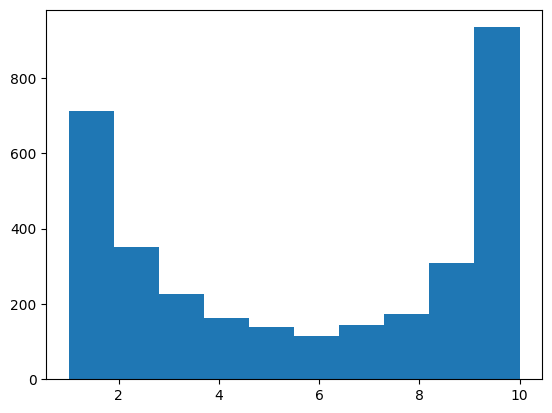

Predicted noise indices: [np.int64(21), np.int64(31), np.int64(95), np.int64(189), np.int64(303), np.int64(371), np.int64(493), np.int64(525), np.int64(582), np.int64(586), np.int64(700), np.int64(708), np.int64(862), np.int64(974), np.int64(1055), np.int64(1089), np.int64(1190), np.int64(1226), np.int64(1288), np.int64(1304), np.int64(1353), np.int64(1455), np.int64(1467), np.int64(1578), np.int64(1587), np.int64(1722), np.int64(1795), np.int64(1842), np.int64(1845), np.int64(1868), np.int64(1920), np.int64(2054), np.int64(2097), np.int64(2428), np.int64(2472), np.int64(2489), np.int64(2567), np.int64(2575), np.int64(2708), np.int64(2973), np.int64(2982), np.int64(3063), np.int64(3128), np.int64(3156), np.int64(3159), np.int64(3161), np.int64(3218), np.int64(3251), np.int64(3257), np.int64(3338), np.int64(3500), np.int64(3512), np.int64(3528), np.int64(3650), np.int64(3671), np.int64(3727), np.int64(3748), np.int64(3766), np.int64(3870), np.int64(3871), np.int64(3896), np.int64(3904),

Epoch 71/1000:   7%|▋         | 72/1000 [1:47:54<23:10:52, 89.93s/it, val_loss=4.65, val_contrastive=1.43, val_accuracy=63.3, train_loss=4.22, train_contrastive=1.44, best_accuracy=65.6, best_loss=4.64]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


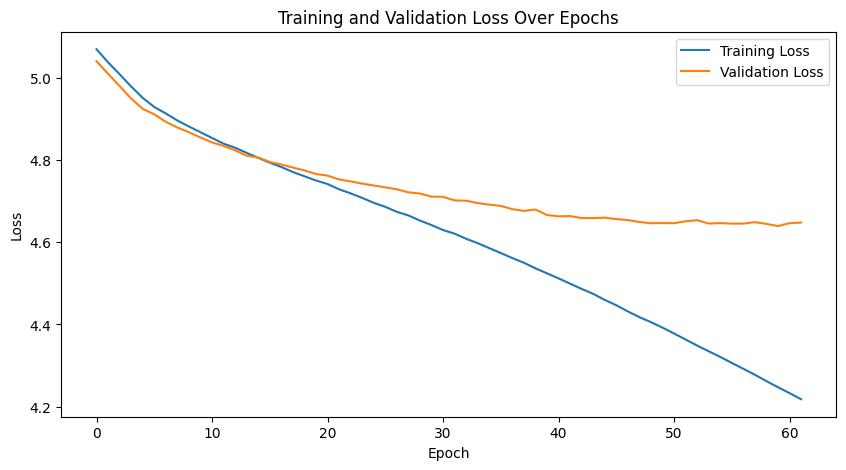

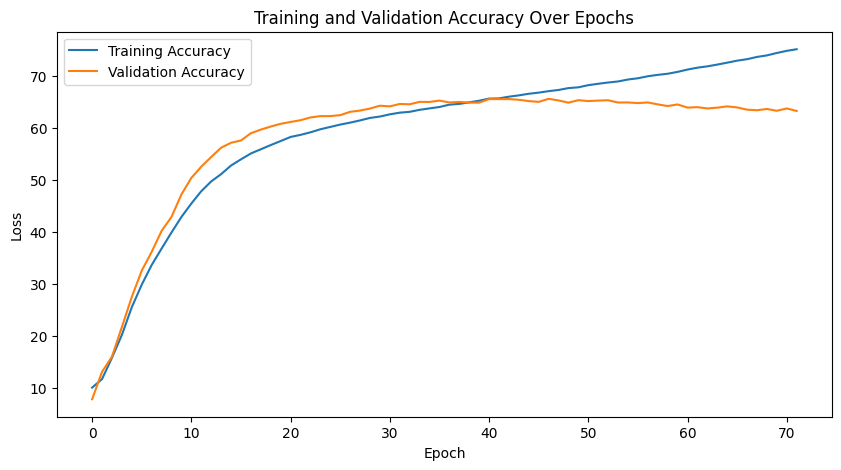

Extracting Embeddings: 100%|██████████| 404/404 [00:11<00:00, 34.02it/s]


Distance between embedding 6343 and 968: 1.5434
Distance between embedding 6343 and 1504: 1.6334
Distance between embedding 6343 and 1331: 1.4071
Distance between embedding 6343 and 838: 1.4358
Distance between embedding 6343 and 4637: 1.1295
Distance between embedding 6343 and 4406: 0.9475
Distance between embedding 6343 and 5878: 1.2935
Distance between embedding 6343 and 5099: 1.6655
Distance between embedding 6343 and 3328: 1.4625
Distance between embedding 6343 and 2311: 1.3935
Distance between embedding 6343 and 1008: 0.9667
Distance between embedding 6343 and 5032: 1.5240
Distance between embedding 6343 and 2665: 1.2661
Distance between embedding 6343 and 4515: 1.3769
Distance between embedding 6343 and 939: 1.3232
Distance between embedding 6343 and 5729: 1.6393
Distance between embedding 6343 and 5575: 0.9682
Distance between embedding 6343 and 4540: 1.6238
Distance between embedding 6343 and 5551: 1.3232
Distance between embedding 968 and 1504: 1.4633
Distance between embeddi

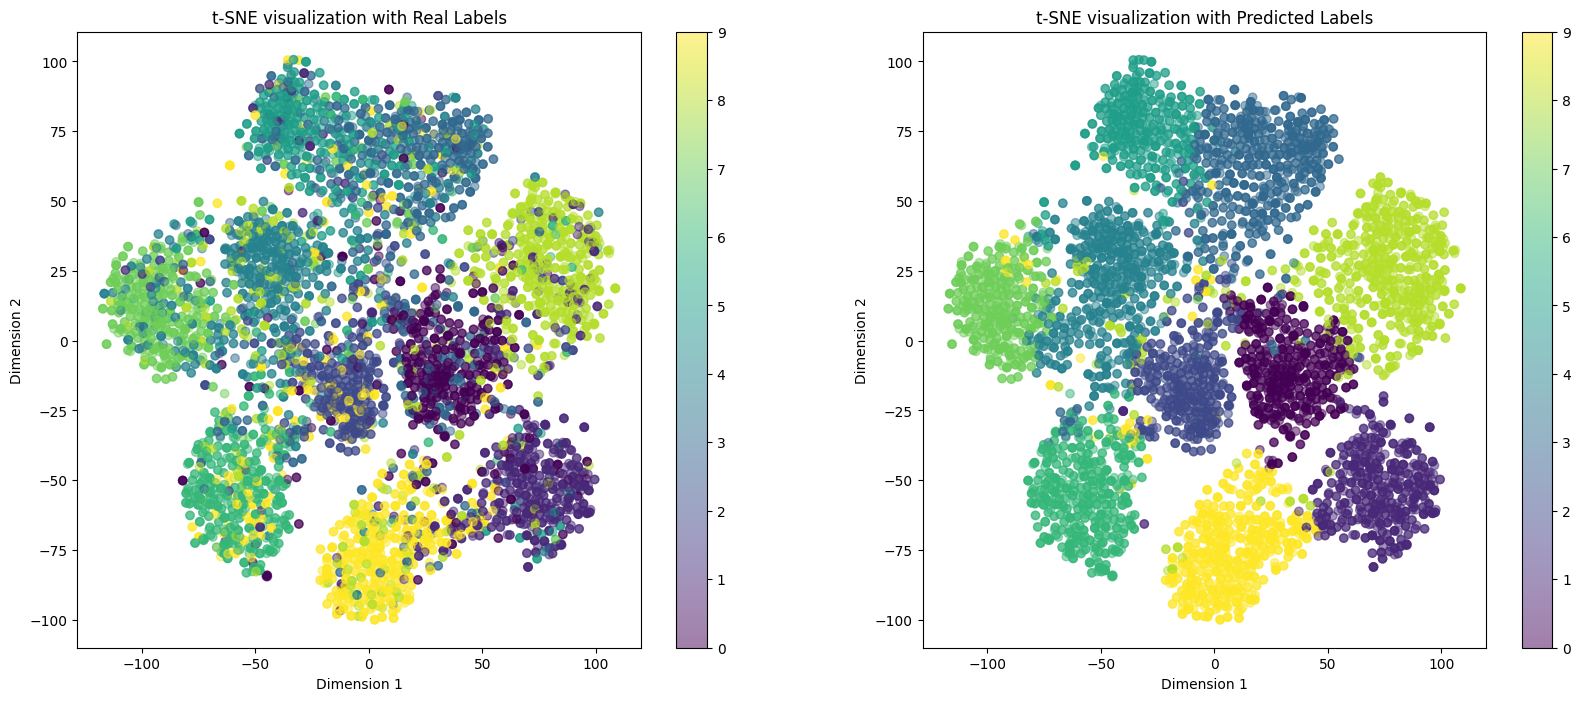

value counts for predicted:
[[  0 610]
 [  1 609]
 [  2 521]
 [  3 771]
 [  4 736]
 [  5 519]
 [  6 612]
 [  7 481]
 [  8 901]
 [  9 704]]
value counts for real:
[[  0 645]
 [  1 634]
 [  2 512]
 [  3 783]
 [  4 686]
 [  5 510]
 [  6 547]
 [  7 471]
 [  8 916]
 [  9 760]]


Testing: 100%|██████████| 404/404 [00:11<00:00, 36.43it/s]


Test Accuracy: 65.64%
Test Precision: 0.66
Test Recall: 0.66
Test F1 Score: 0.66
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 88/1000:   9%|▉         | 89/1000 [2:17:55<23:31:49, 92.99s/it, val_loss=4.61, val_contrastive=1.44, val_accuracy=62.7, train_loss=4.14, train_contrastive=1.44, best_accuracy=64.8, best_loss=4.61]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 35.58it/s]


Test Accuracy: 64.77%
Test Precision: 0.65
Test Recall: 0.65
Test F1 Score: 0.65
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/10...


Epoch 78/1000:   8%|▊         | 79/1000 [2:02:22<23:46:36, 92.94s/it, val_loss=4.63, val_contrastive=1.44, val_accuracy=65.9, train_loss=4.3, train_contrastive=1.42, best_accuracy=67.2, best_loss=4.62] 
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:11<00:00, 36.37it/s]


Test Accuracy: 67.25%
Test Precision: 0.68
Test Recall: 0.67
Test F1 Score: 0.67
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/10...


Epoch 69/1000:   7%|▋         | 70/1000 [1:47:08<23:43:30, 91.84s/it, val_loss=4.72, val_contrastive=1.44, val_accuracy=63.3, train_loss=4.43, train_contrastive=1.39, best_accuracy=65.1, best_loss=4.72]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:10<00:00, 37.77it/s]


Test Accuracy: 65.07%
Test Precision: 0.65
Test Recall: 0.65
Test F1 Score: 0.65
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/10...


Epoch 79/1000:   8%|▊         | 80/1000 [2:00:26<23:05:03, 90.33s/it, val_loss=4.74, val_contrastive=1.43, val_accuracy=61.2, train_loss=4.26, train_contrastive=1.45, best_accuracy=64.3, best_loss=4.74]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:10<00:00, 37.91it/s]


Test Accuracy: 64.26%
Test Precision: 0.64
Test Recall: 0.64
Test F1 Score: 0.64
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/10...


Epoch 90/1000:   9%|▉         | 91/1000 [2:19:21<23:12:03, 91.89s/it, val_loss=4.74, val_contrastive=1.38, val_accuracy=60.4, train_loss=4.31, train_contrastive=1.41, best_accuracy=62.4, best_loss=4.74]
a:\Projects\SiameseNoiseDetection\models\trainer.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where y

Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 404/404 [00:10<00:00, 37.40it/s]


Test Accuracy: 62.39%
Test Precision: 0.63
Test Recall: 0.62
Test F1 Score: 0.62
Model saved to cifar10/resnet34/model_resnet34_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/10...


Epoch 0/1000:   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
noise_cleaner.clean()

In [4]:
import torch
import torch.functional as F
import torch.nn.functional as F
import torch.nn as nn
from torchvision.models import resnet18, ResNet18_Weights
from torchvision.models import resnet34, ResNet34_Weights
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.models import wide_resnet50_2, Wide_ResNet50_2_Weights
from torchvision.models import vgg16_bn, VGG16_BN_Weights
from torchvision.models import vgg19_bn, VGG19_BN_Weights
from models.preact import *
from models.cnn import CustomCNN
from models.dla import DLA
from torchsummary import summary

pre_trained = True
base_model = nn.Sequential(
                nn.Conv2d(3, 32, 3, stride=1, padding=1),  #out ->  b, 16, 14, 14
                nn.ReLU(True),
                nn.MaxPool2d(kernel_size=2, stride=2),  #out -> b, 16, 8, 8
                
                nn.Conv2d(32, 64, 3, stride=1, padding=1),  #out -> b, 8, 8, 8
                nn.ReLU(True),
                nn.MaxPool2d(kernel_size=2, stride=2, padding=1),  #out -> b, 8, 5, 5
                nn.Flatten(),
                
                nn.Linear(5184, 256),
                nn.ReLU(),
                )
base_model.fc = nn.Flatten()

base_model = base_model.cuda()
if hasattr(base_model, 'fc'):
    base_model.fc = nn.Flatten()
    feature_extractor = base_model
else:
    feature_extractor = nn.Sequential(*list(base_model.children())[:-1])
summary(feature_extractor, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
         MaxPool2d-3           [-1, 32, 16, 16]               0
            Conv2d-4           [-1, 64, 16, 16]          18,496
              ReLU-5           [-1, 64, 16, 16]               0
         MaxPool2d-6             [-1, 64, 9, 9]               0
           Flatten-7                 [-1, 5184]               0
            Linear-8                  [-1, 256]       1,327,360
              ReLU-9                  [-1, 256]               0
          Flatten-10                  [-1, 256]               0
Total params: 1,346,752
Trainable params: 1,346,752
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.90
Params size (MB): 5.14
Estimat

## New Expreiment

In [1]:
from models.vae import *  # Import your custom VAE model and loss
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from models.dataset import CustomDataset  # Assuming CustomDataset is custom-made

# Define transformations with augmentations
augmented_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomCrop(size=64, padding=4),  # Random cropping with padding
    transforms.AutoAugment(policy=transforms.autoaugment.AutoAugmentPolicy.CIFAR10),  # AutoAugment for CIFAR10
    transforms.Grayscale(num_output_channels=3),  # Convert to grayscale with 3 channels to match input
    transforms.ToTensor()  # Convert to tensor
])

# Load CIFAR10 dataset
train_dataset = datasets.CIFAR10(root='data', train=True, download=False)

# Wrap the CIFAR10 dataset using CustomDataset (assuming it's necessary)
dataset = CustomDataset(train_dataset, transform=augmented_transform)

# DataLoader with batch size and shuffling (shuffle=True for training)
train_loader = DataLoader(dataset, batch_size=800, shuffle=True)

# Initialize the VAE loss function (MSE reconstruction loss)
vae_loss_fn = VAELoss(reconstruction_loss_type="mse")

# Define VAE parameters
latent_dim = 20
hidden_dim = 256
output_dim = 32*32  # Output feature dimension from ResNet18

# Initialize the VAE model
vae = VAE(latent_dim)

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vae = vae.to(device)

# Optimizer (Adam)
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

# Training loop function
def train(epoch):
    vae.train()  # Set the model to training mode
    train_loss = 0  # Track the total loss
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)  # Move the data to the GPU if available
        optimizer.zero_grad()  # Reset the gradients
        recon_batch, mu, logvar = vae(data)  # Forward pass through VAE
        loss = vae_loss_fn(recon_batch, data, mu, logvar)  # Calculate VAE loss
        loss.backward()  # Backpropagation
        train_loss += loss.item()  # Accumulate the loss
        optimizer.step()  # Update model parameters

    # Print the average loss for the epoch
    print(f'Epoch {epoch}, Loss: {train_loss / len(train_loader.dataset)}')

# Train the VAE model for 10 epochs
for epoch in range(1, 11):
    train(epoch)

Epoch 1, Loss: 116613.89822875
Epoch 2, Loss: 652.5716528125
Epoch 3, Loss: 568.0243871875
Epoch 4, Loss: 514.767764375
Epoch 5, Loss: 486.0452425
Epoch 6, Loss: 462.51460625
Epoch 7, Loss: 445.3024959375
Epoch 8, Loss: 435.4643065625
Epoch 9, Loss: 421.8742640625
Epoch 10, Loss: 410.498935625


In [10]:
for epoch in range(11, 251):
    train(epoch)

Epoch 11, Loss: 201.806855
Epoch 12, Loss: 202.6633796875
Epoch 13, Loss: 201.838084375
Epoch 14, Loss: 201.56012296875
Epoch 15, Loss: 201.4204365625
Epoch 16, Loss: 200.68404078125
Epoch 17, Loss: 201.663695
Epoch 18, Loss: 200.3300196875
Epoch 19, Loss: 199.64572921875
Epoch 20, Loss: 199.5438884375
Epoch 21, Loss: 200.0736596875
Epoch 22, Loss: 199.000961875
Epoch 23, Loss: 198.2702909375
Epoch 24, Loss: 198.83876625
Epoch 25, Loss: 198.64641234375
Epoch 26, Loss: 198.174250625
Epoch 27, Loss: 198.654705
Epoch 28, Loss: 197.083101875
Epoch 29, Loss: 197.42817328125
Epoch 30, Loss: 198.018560625
Epoch 31, Loss: 198.42947609375
Epoch 32, Loss: 197.05003609375
Epoch 33, Loss: 196.3795140625
Epoch 34, Loss: 196.21175421875
Epoch 35, Loss: 195.6715984375
Epoch 36, Loss: 195.1604253125
Epoch 37, Loss: 194.5808478125
Epoch 38, Loss: 194.105665625
Epoch 39, Loss: 193.917190625
Epoch 40, Loss: 194.8503015625
Epoch 41, Loss: 194.7926415625
Epoch 42, Loss: 194.34278609375
Epoch 43, Loss: 193.

KeyboardInterrupt: 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch

def extract_embeddings(vae: VAE, dataloader, device):
    vae.eval()
    embeddings = []
    labels = []
    
    with torch.no_grad():
        for data, targets in dataloader:
            data = data.to(device)
            z = vae.latent_embedding(data)
            embeddings.append(z.cpu().numpy())
            labels.append(targets.numpy())

    embeddings = np.concatenate(embeddings, axis=0)
    labels = np.concatenate(labels, axis=0)
    return embeddings, labels

def apply_tsne(embeddings):
    tsne = TSNE(n_components=2, random_state=0)
    embeddings_2d = tsne.fit_transform(embeddings)
    return embeddings_2d

def plot_embeddings(embeddings_2d, labels):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.colorbar(scatter)
    plt.title('2D t-SNE of VAE Embeddings')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()


In [11]:
embeddings, labels = extract_embeddings(vae, train_loader, device)
embeddings_2d = apply_tsne(embeddings)
plot_embeddings(embeddings_2d, labels)

KeyboardInterrupt: 

## Animal10N

In [2]:
from models.dataset import Animal10NDataset
from models.siamese_tester import SiameseTester
from models.siamese import *
from models.predefined import InstanceDependentNoiseAdder
from torchvision import transforms
from torchvision.datasets import FashionMNIST, CIFAR10, CIFAR100, MNIST
from models.cleaner import NoiseCleaner
from models.predictor import Predictor

train_dataset = Animal10NDataset('data/Animal10N/training')
test_dataset = Animal10NDataset('data/Animal10N/testing')
transform = transforms.Compose([
                                #transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
augmented_transform = transforms.Compose([
                                transforms.RandomCrop(size=64, padding=4),
                                #transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
noise_cleaner = NoiseCleaner(train_dataset, noise_type='none', model_save_path="cifar10/resnet34/model_resnet34_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='vgg19-bn', train_noise_level=0, epochs_num=500, train_pairs=200000, 
                             val_pairs=10000, embedding_dimension=128, lr=1e-3, optimizer='Adam', patience=7, transform=transform,
                             weight_decay=0.0005, training_batch_size=450, pre_trained=False, dropout_prob=0.2, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', cnn_size=None)

In [ ]:
noise_cleaner.clean()

Seed: 74


Epoch 17/50:  32%|███▏      | 16/50 [00:40<01:25,  2.52s/it, train_loss=4.99, val_loss=4.96, val_accuracy=12.8]

Early stopping triggered
Loading best model from checkpoint...
best accuracy: 12.75


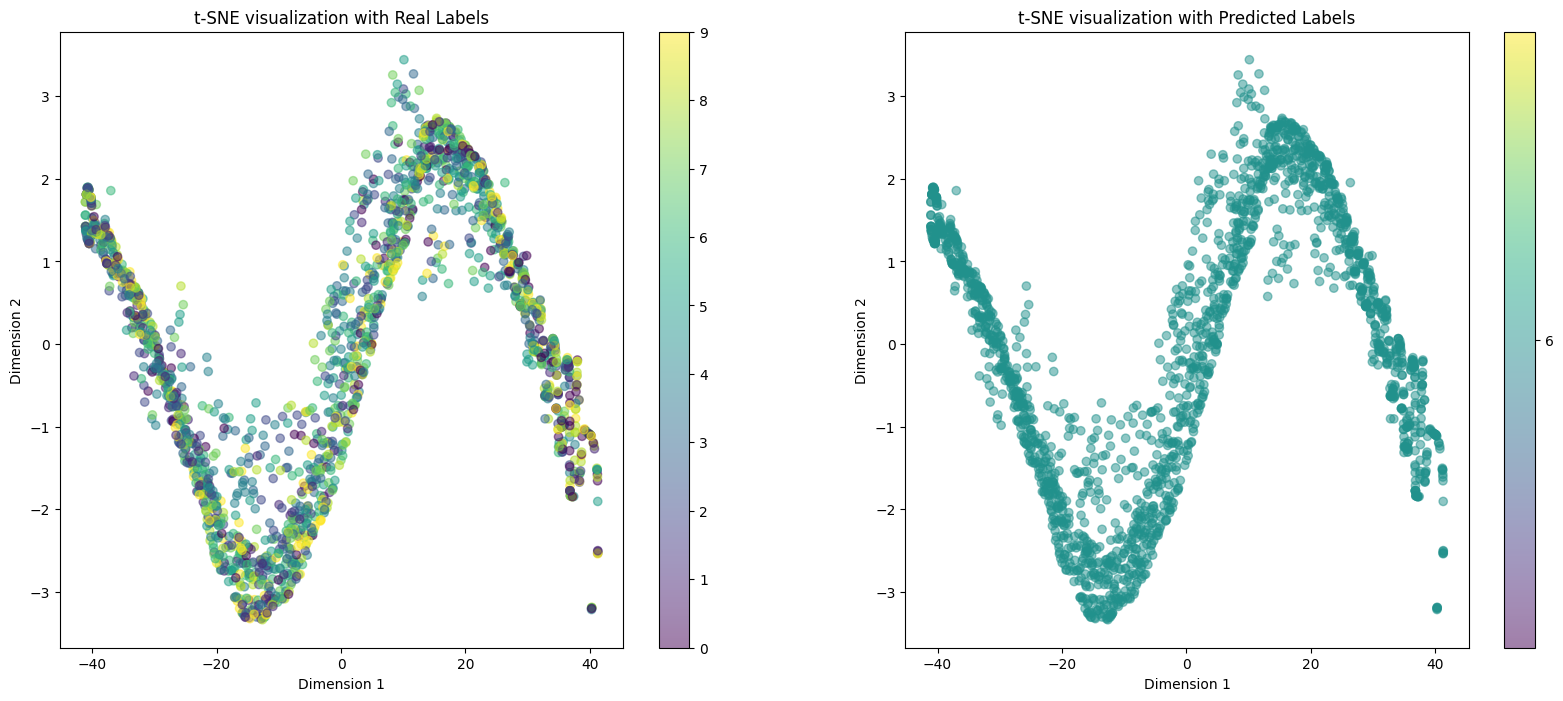

In [5]:
from models.siamese_tester import SiameseTester
from models.siamese import *
from models.predefined import InstanceDependentNoiseAdder

transform = transforms.Compose([                                
                                transforms.RandomCrop(size=32, padding=4),
                                transforms.RandomHorizontalFlip(),
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
augmented_transform = transforms.Compose([
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
train_dataset = CIFAR10(root='data', train=True, download=False)
train_noise_adder = InstanceDependentNoiseAdder(train_dataset, image_size=3072, ratio=0.2, num_classes=10)
train_noise_adder.add_noise()
tester = SiameseTester(train_dataset, SiameseNetwork, transform=transform, augmented_transform=augmented_transform)
tester.train(50)

In [258]:
transform = transforms.Compose([transforms.RandomCrop(32, padding=4), transforms.RandomHorizontalFlip(), transforms.ToTensor()])

In [259]:
clean_train_dataset = noise_cleaner.clean_dataset
test_dataset = CIFAR10(root='data', train=False, download=False)
predictor = Predictor(train_dataset=clean_train_dataset, test_dataset=test_dataset, transform=transform, num_classes=10, 
                      model_type='resnet18', batch_size=2048, pre_trained=True, weight_decay=0.0005)

In [ ]:
predictor.train(120)

In [267]:
predictor.evaluate()

Evaluating: 100%|██████████| 5/5 [00:01<00:00,  4.70it/s]

Test Accuracy: 77.23%


0.7723

In [119]:
predictor.free_model()

In [ ]:
for i in range(5):
    predictor.train(2)
    predictor.evaluate()